#시계열자료분석

##CH03 평활법

### 패키지 설치

In [1]:

install.packages("data.table")
install.packages("ggplot2")
install.packages("lmtest")
install.packages("TTR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xts’




In [2]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [3]:
library(forecast)
library(data.table)
library(ggplot2)
library(lmtest)
library(TTR)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [4]:
options(repr.plot.width=15,repr.plot.height=8)

### 이동평균법

#### Kings data

In [5]:
kings=scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)

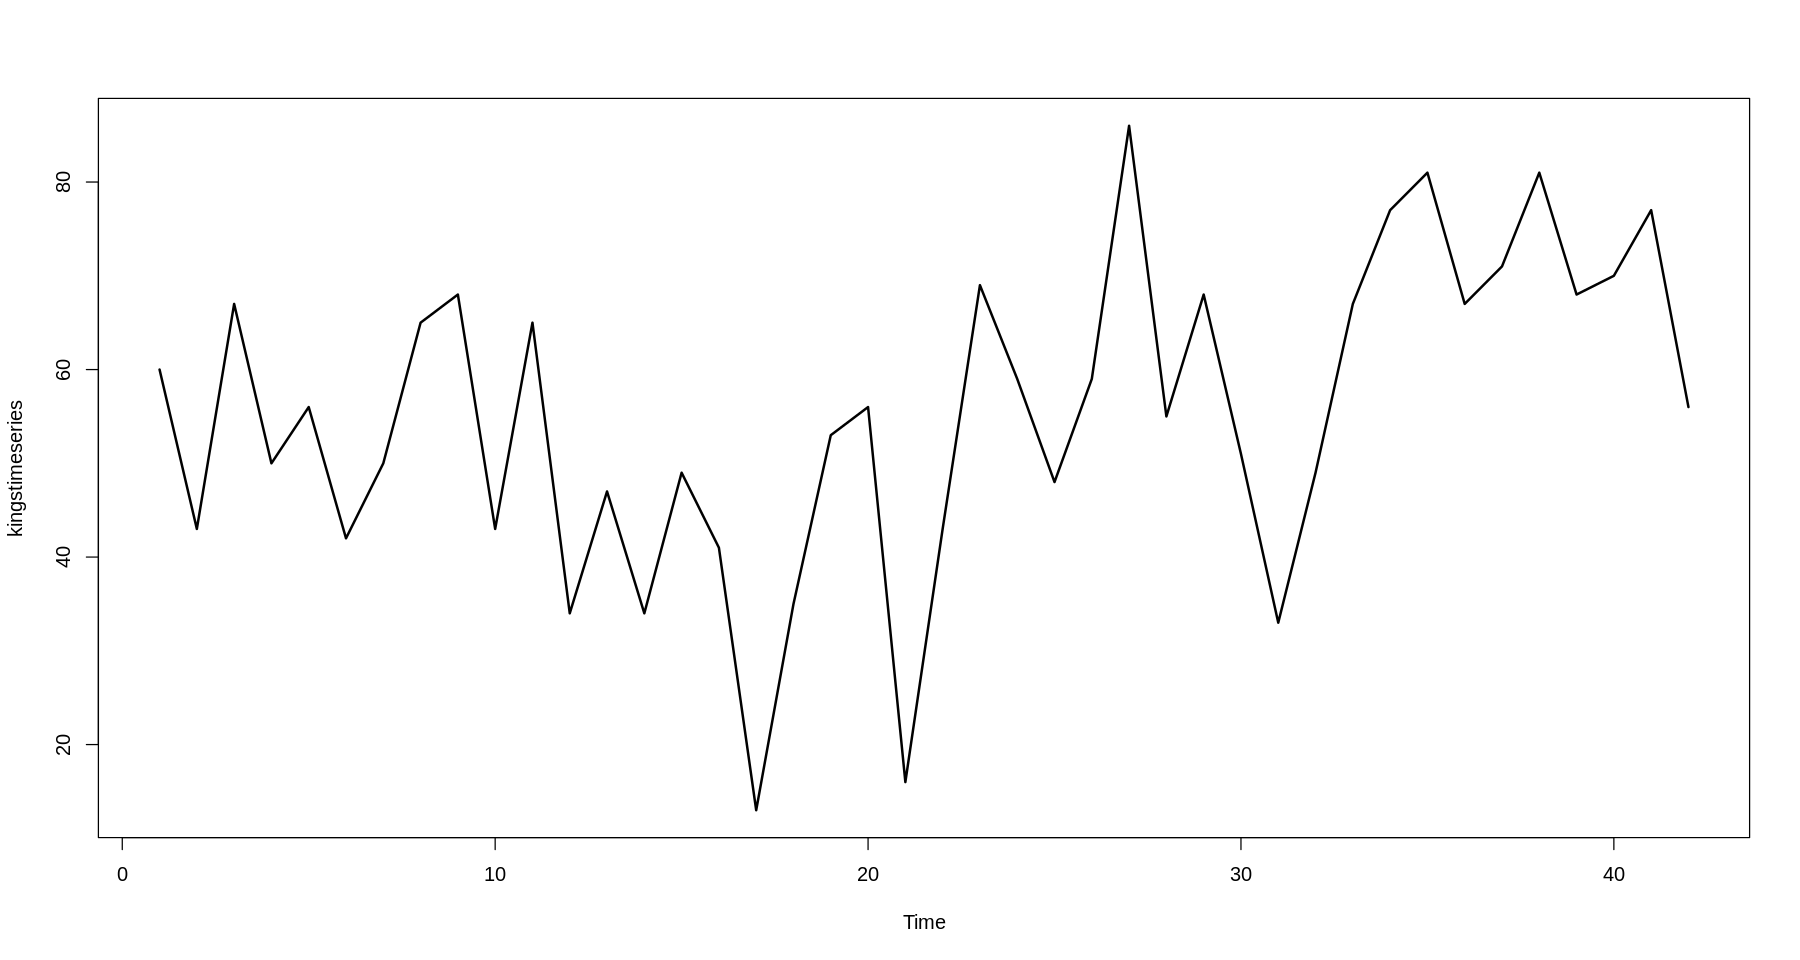

In [6]:
kingstimeseries=ts(kings)
plot(kingstimeseries,lwd=2)

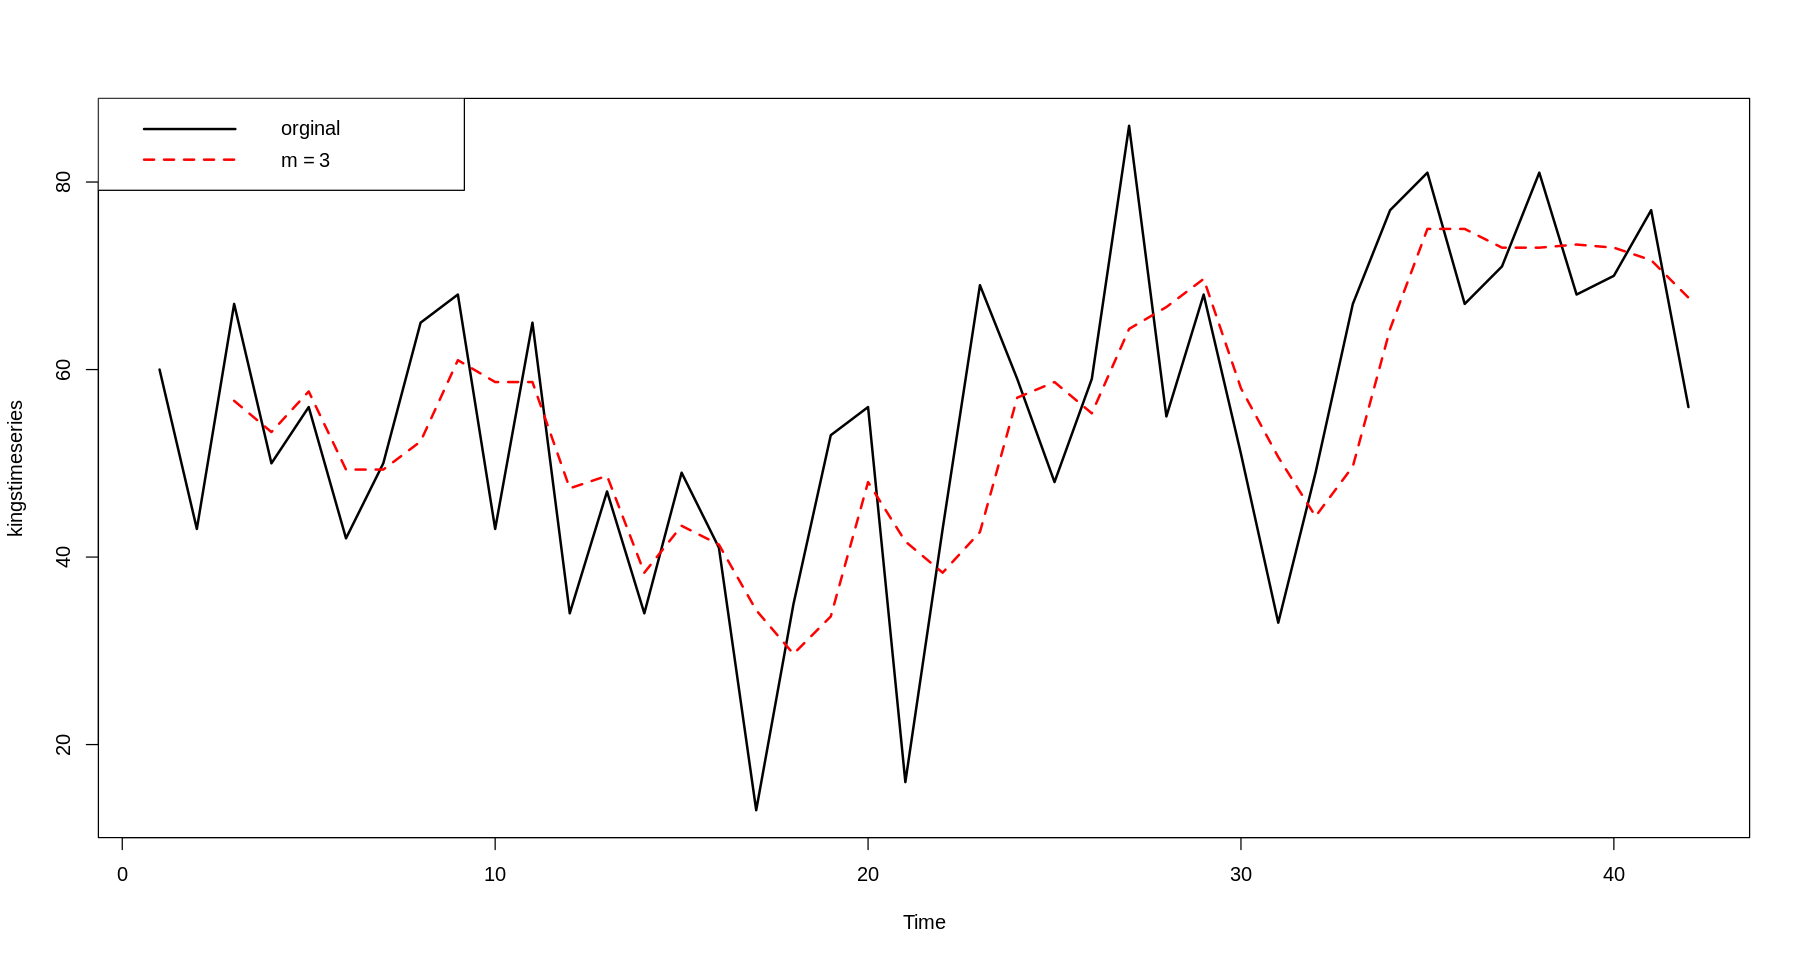

In [7]:
## window size=3
kingstimeseriesSMA3=SMA(kingstimeseries,n=3) ##simple moving average ->3평활
plot.ts(kingstimeseries,lwd=2)
lines(kingstimeseriesSMA3,col='red',lty=2,lwd=2)
legend("topleft",legend=c("orginal",expression(m==3)),col=c("black","red"),lty=c(1,2),lwd=2)

In [8]:
kingstimeseries

A Time Series:
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [9]:
kingstimeseriesSMA3 ##3평활값

A Time Series:
 [1]       NA       NA 56.66667 53.33333 57.66667 49.33333 49.33333 52.33333
 [9] 61.00000 58.66667 58.66667 47.33333 48.66667 38.33333 43.33333 41.33333
[17] 34.33333 29.66667 33.66667 48.00000 41.66667 38.33333 42.66667 57.00000
[25] 58.66667 55.33333 64.33333 66.66667 69.66667 58.00000 50.66667 44.33333
[33] 49.66667 64.33333 75.00000 75.00000 73.00000 73.00000 73.33333 73.00000
[41] 71.66667 67.66667

- 3개씩 평활하므로 1,2번 데이터는 결측값임

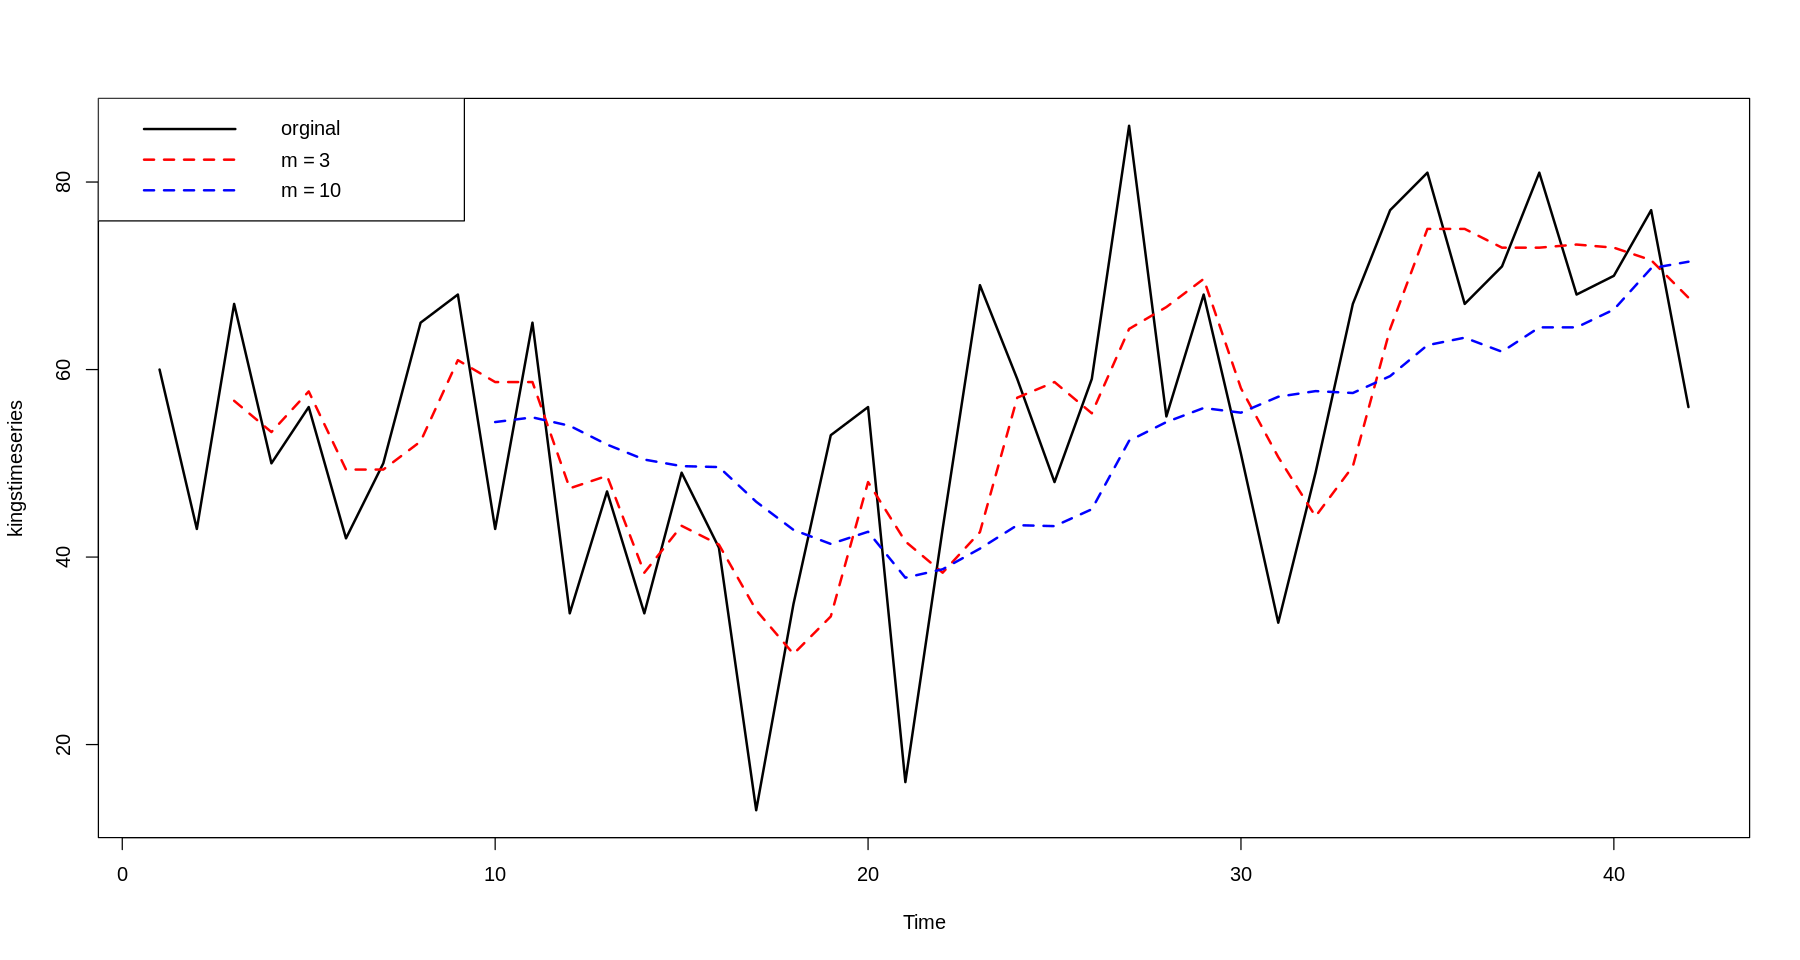

In [10]:
## window size=3 vs window size=7
plot.ts(kingstimeseries,lwd=2)
lines(kingstimeseriesSMA3,col="red",lty=2,lwd=2)
lines(SMA(kingstimeseries,n=10),col='blue',lty=2,lwd=2)
legend("topleft",legend=c("orginal",expression(m==3),expression(m==10)),col=c("black","red","blue"),lty=c(1,2,2),lwd=2)

- 평활을 통해서 전체적인 추세를 확인

### mindex data
-> 중간재 출하지수 데이터

In [11]:
z=scan("mindex.txt")
mindex=ts(z,start=c(1986,1),frequency=12)
mindex

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,9.3,10.7,13.3,14.1,17.8,18.1,19.4,18.8,19.1,18.4,18.0,17.0
1987,19.5,20.1,19.4,15.7,15.6,16.1,14.9,16.0,14.6,18.3,18.2,23.0
1988,22.2,22.1,18.8,17.7,13.8,12.7,16.5,15.6,16.3,10.7,10.4,7.0
1989,4.7,4.5,4.0,6.0,6.2,5.7,4.4,4.2,5.0,5.8,6.4,4.9
1990,7.9,8.2,11.8,10.0,11.1,11.7,12.4,15.2,14.0,15.2,12.9,18.0
1991,14.4,12.7,8.3,11.5,11.9,11.6,10.3,8.5,11.6,12.3,14.5,11.1
1992,11.8,12.4,12.7,9.8,10.0,10.2,9.6,6.9,5.3,4.8,4.6,1.9
1993,3.8,4.7,7.7,7.0,7.2,7.8,8.6,11.4,10.7,11.8,11.3,16.0
1994,13.2,12.0,8.5,11.4,,,,,,,,


In [12]:
mindex_sma3=SMA(mindex,n=3)
mindex_sma10=SMA(mindex,n=10)

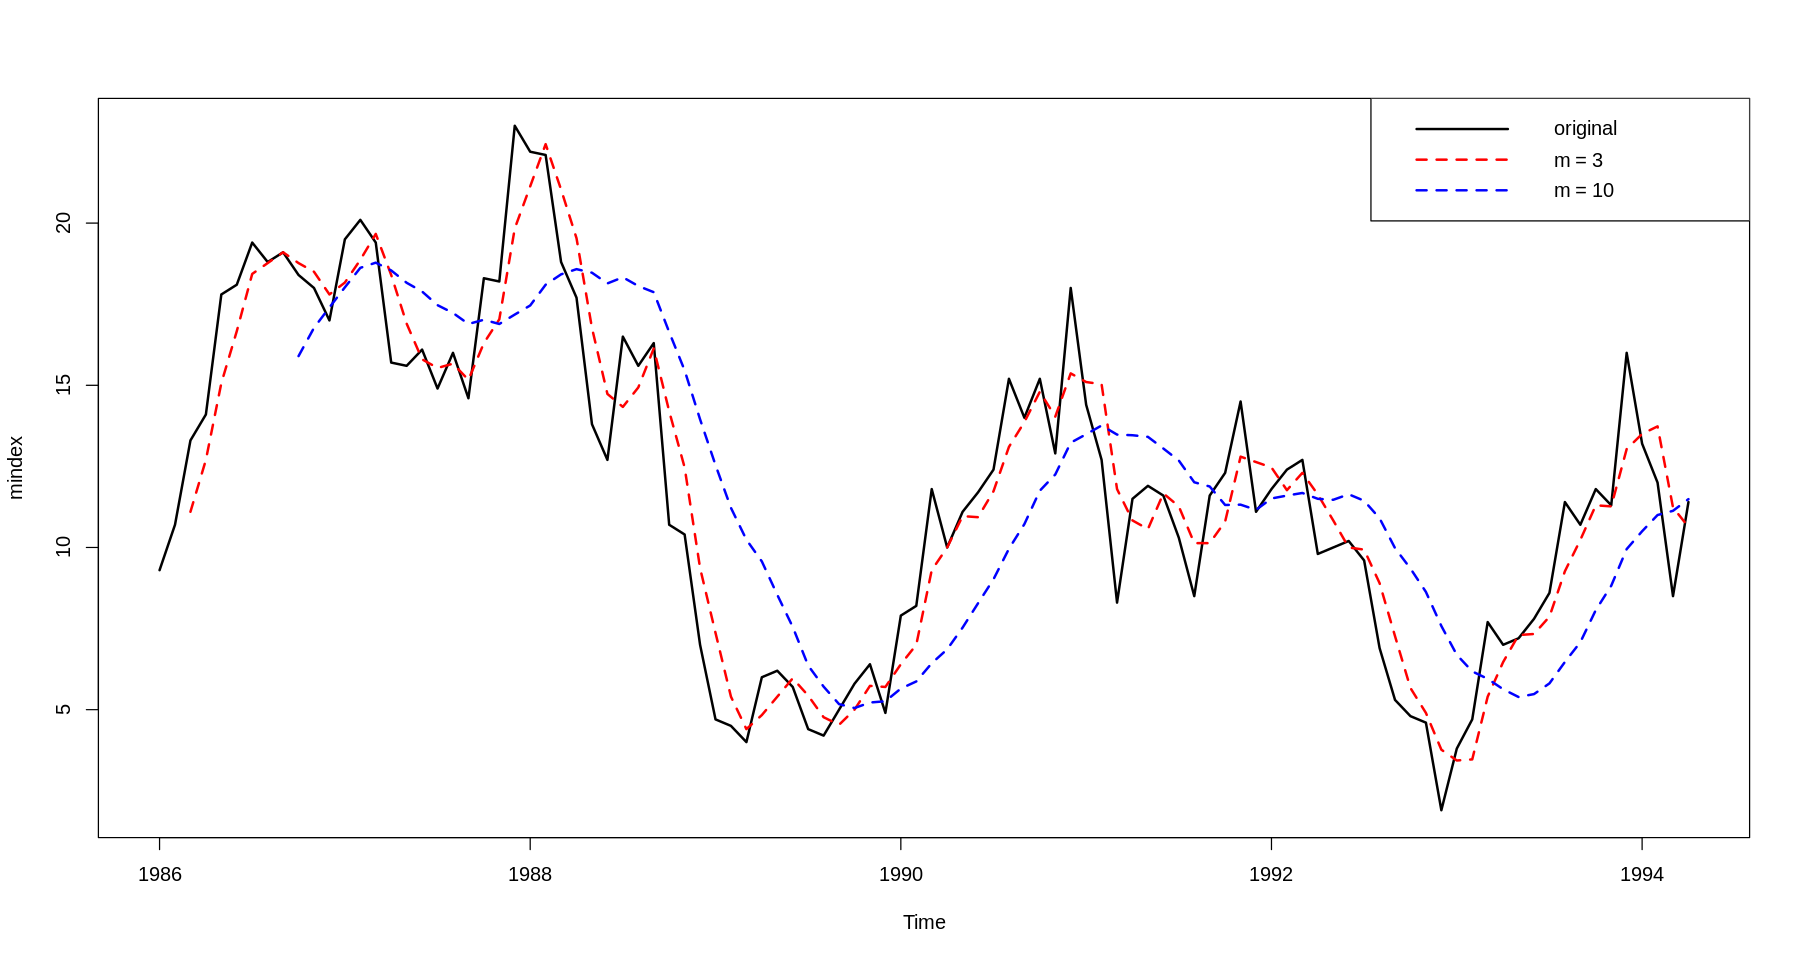

In [14]:
plot.ts(mindex,lwd=2)
lines(mindex_sma3,col="red",lty=2,lwd=2)
lines(mindex_sma10,col="blue",lty=2,lwd=2)
legend("topright",legend=c("original",expression(m==3),expression(m==10)),col=c("black","red","blue"),lty=c(1,2,2),lwd=2)

##단순지수평활법

In [15]:
z=scan("mindex.txt")
mindex=ts(z,start=c(1986,1),frequency=12)

In [16]:
tmp.dat=data.frame(day=seq.Date(as.Date("1986-01-01"),by="month",length.out=length(z)),ind=z)
head(tmp.dat)

,day,ind
,<date>,<dbl>
1,1986-01-01,9.3
2,1986-02-01,10.7
3,1986-03-01,13.3
4,1986-04-01,14.1
5,1986-05-01,17.8
6,1986-06-01,18.1


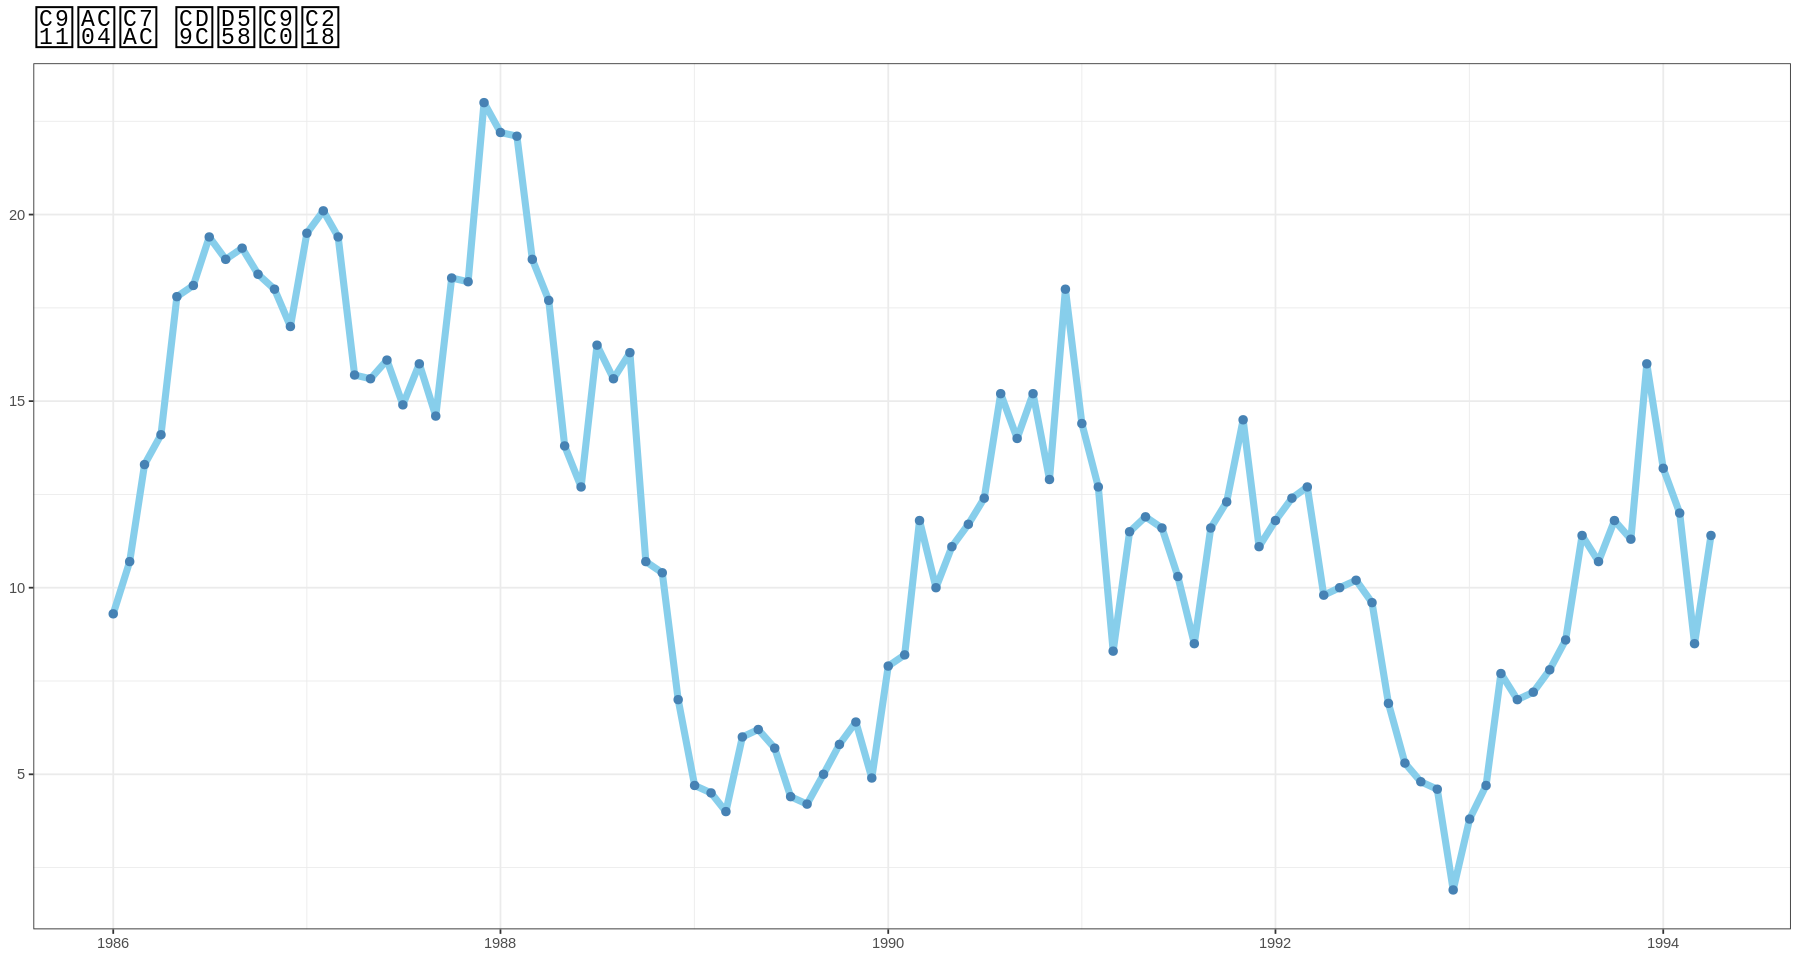

In [17]:
ggplot(tmp.dat,aes(day,ind))+geom_line(col="skyblue",lwd=2)+
  geom_point(col="steelblue",cex=2)+
  ggtitle("중간재 출하지수")+
  theme_bw()+
  theme(plot.title=element_text(size=30),
        axis.title=element_blank())

- 전반적으로 추세나 계절성분은 존재하지 않는 것처럼 보임

- -> 따라서 단순지수평활

### 단순지수 평활 α=0.3

In [18]:
fit0=HoltWinters(mindex,alpha=0.3,beta=FALSE,gamma=FALSE)
fit0

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mindex, alpha = 0.3, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.3
 beta : FALSE
 gamma: FALSE

Coefficients:
     [,1]
a 11.2236

In [19]:
ls(fit0)

[1] "alpha"        "beta"         "call"         "coefficients" "fitted"      
[6] "gamma"        "seasonal"     "SSE"          "x"

In [20]:
fit0$coefficients

a 
11.2236

- -> 마지막데이터의 시점 이후부터는 이값을 통해서 예측

In [21]:
head(fit0$fitted) ##평활값

,xhat,level
Feb 1986,9.30000,9.30000
Mar 1986,9.72000,9.72000
Apr 1986,10.79400,10.79400
May 1986,11.78580,11.78580
Jun 1986,13.59006,13.59006
Jul 1986,14.94304,14.94304


In [22]:
fit0$SSE

[1] 792.9686

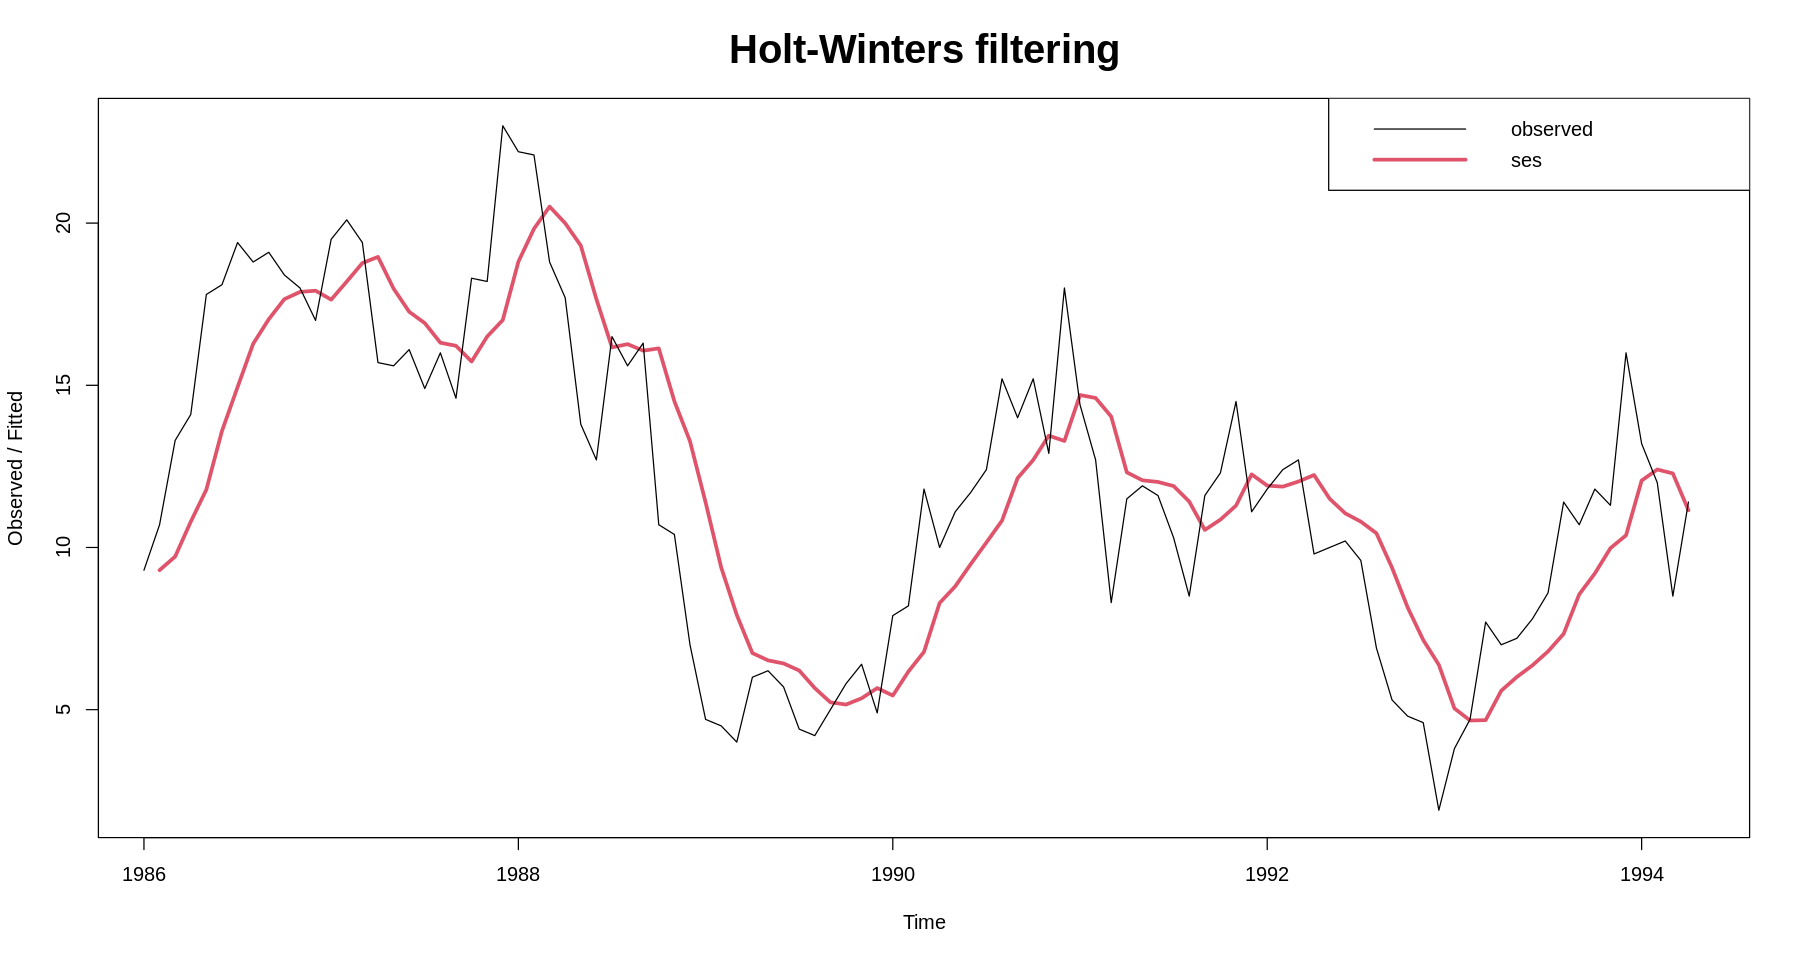

In [23]:
plot(fit0,lwd=3,cex.main=2)
legend("topright",legend=c("observed","ses"),lty=1,lwd=c(1,3),col=1:2)

In [24]:
fit01=ses(mindex,alpha=0.3,initial="simple",h=10) ##Exponential smoothing forecasts h값은 앞으로 예측하고 싶은 구간

In [25]:
fit01

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 1994        11.2236 7.614786 14.83241 5.704397 16.74280
Jun 1994        11.2236 7.455888 14.99131 5.461383 16.98581
Jul 1994        11.2236 7.303425 15.14377 5.228212 17.21898
Aug 1994        11.2236 7.156674 15.29052 5.003775 17.44342
Sep 1994        11.2236 7.015037 15.43216 4.787159 17.66003
Oct 1994        11.2236 6.878013 15.56918 4.577601 17.86959
Nov 1994        11.2236 6.745181 15.70201 4.374450 18.07274
Dec 1994        11.2236 6.616176 15.83102 4.177155 18.27004
Jan 1995        11.2236 6.490686 15.95651 3.985235 18.46196
Feb 1995        11.2236 6.368439 16.07875 3.798273 18.64892

- Forecast= coefficient
- Lo80~ Hi80 : 80% 신뢰구간
- Lo95~ Hi95 : 95% 신뢰구간

In [26]:
ls(fit01)

[1] "fitted"    "level"     "lower"     "mean"      "method"    "model"    
 [7] "residuals" "series"    "upper"     "x"

In [27]:
summary(fit01)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = mindex, h = 10, initial = "simple", alpha = 0.3) 

  Smoothing parameters:
    alpha = 0.3 

  Initial states:
    l = 9.3 

  sigma:  2.816
Error measures:
                     ME    RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.06411989 2.81597 2.248923 -7.657492 24.93904 0.4105067 0.6648489

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 1994        11.2236 7.614786 14.83241 5.704397 16.74280
Jun 1994        11.2236 7.455888 14.99131 5.461383 16.98581
Jul 1994        11.2236 7.303425 15.14377 5.228212 17.21898
Aug 1994        11.2236 7.156674 15.29052 5.003775 17.44342
Sep 1994        11.2236 7.015037 15.43216 4.787159 17.66003
Oct 1994        11.2236 6.878013 15.56918 4.577601 17.86959
Nov 1994        11.2236 6.745181 15.70201 4.374450 18.07274
Dec 1994        11.2236 6.616176 15.83102 4.177155 18.27004
Jan 1995        11

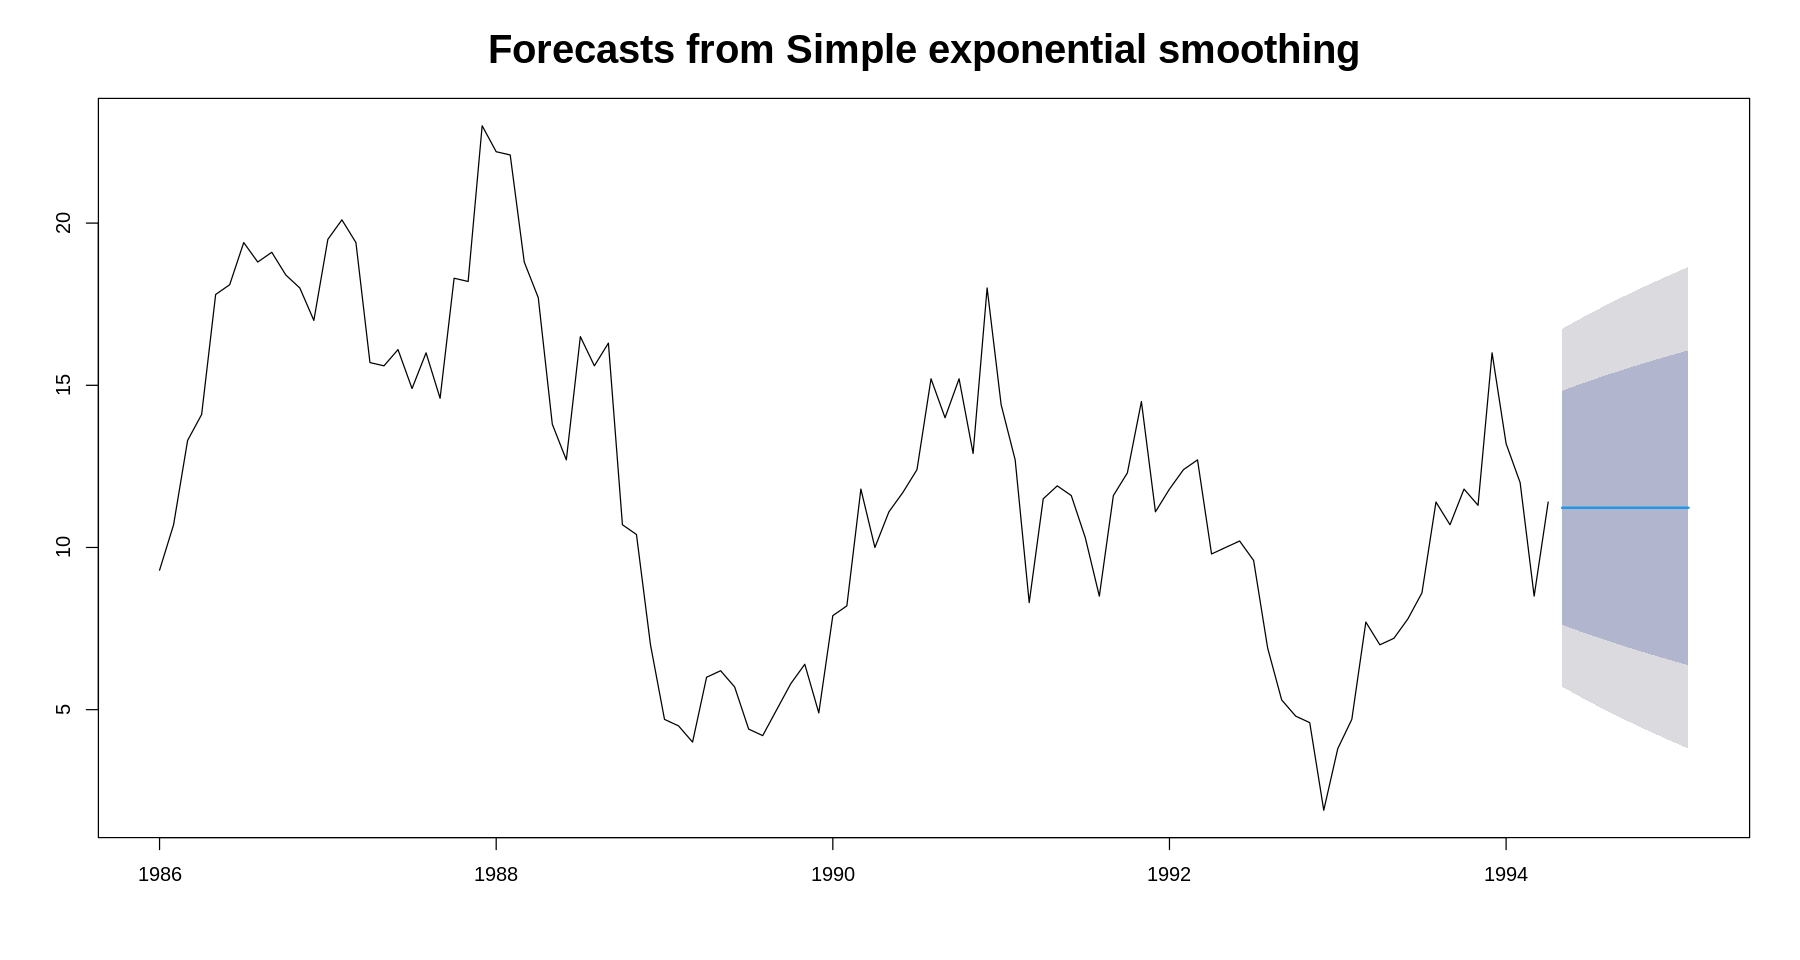

In [28]:
plot(fit01,cex.main=2)

### 여러가지 평활 상수에 따른 변화

In [29]:
w=c(seq(0.1,0.8,0.1),seq(0.81,0.99,0.01))

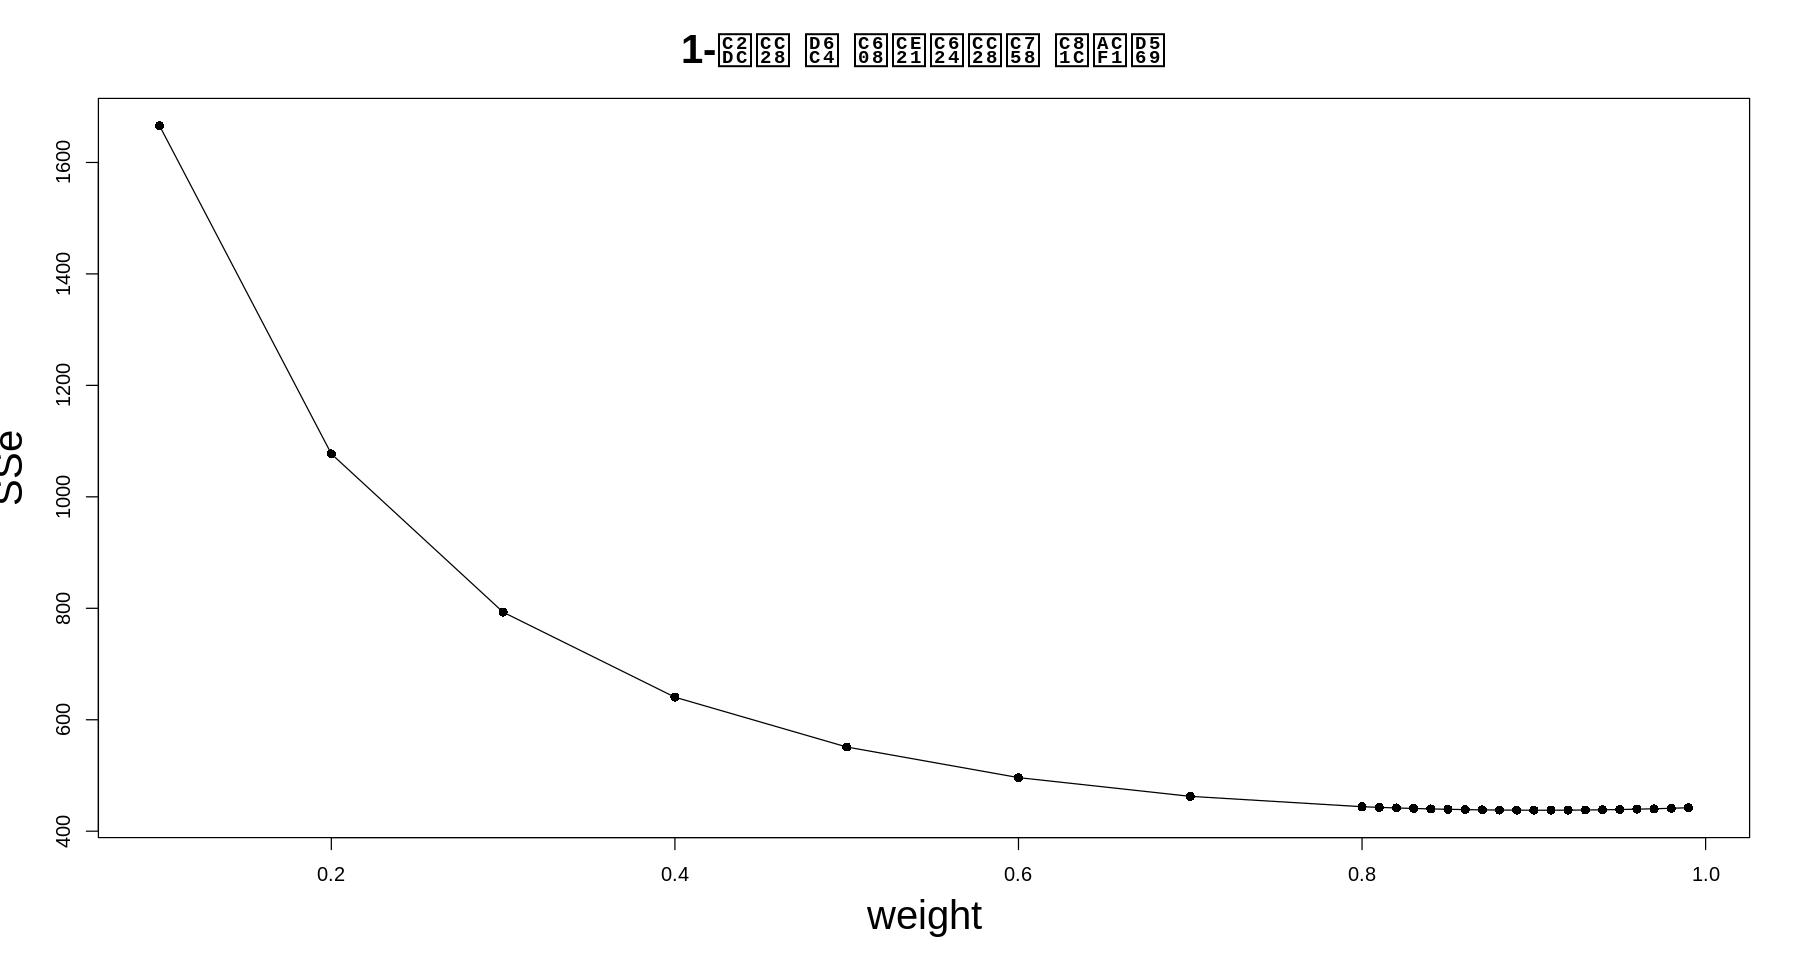

In [30]:
SSE_ses=sapply(w,function(alpha) HoltWinters(mindex,alpha=alpha,beta=FALSE,gamma=FALSE)$SSE)
plot(w,SSE_ses,type="o",xlab="weight",ylab="SSe",pch=16,main="1-시차 후 예측오차의 제곱합",cex.main=2,cex.lab=2)

In [31]:
which.min(SSE_ses) ##SSE를 가장 작게 해주는 값의 위치

[1] 18

In [32]:
w[which.min(SSE_ses)]

[1] 0.9

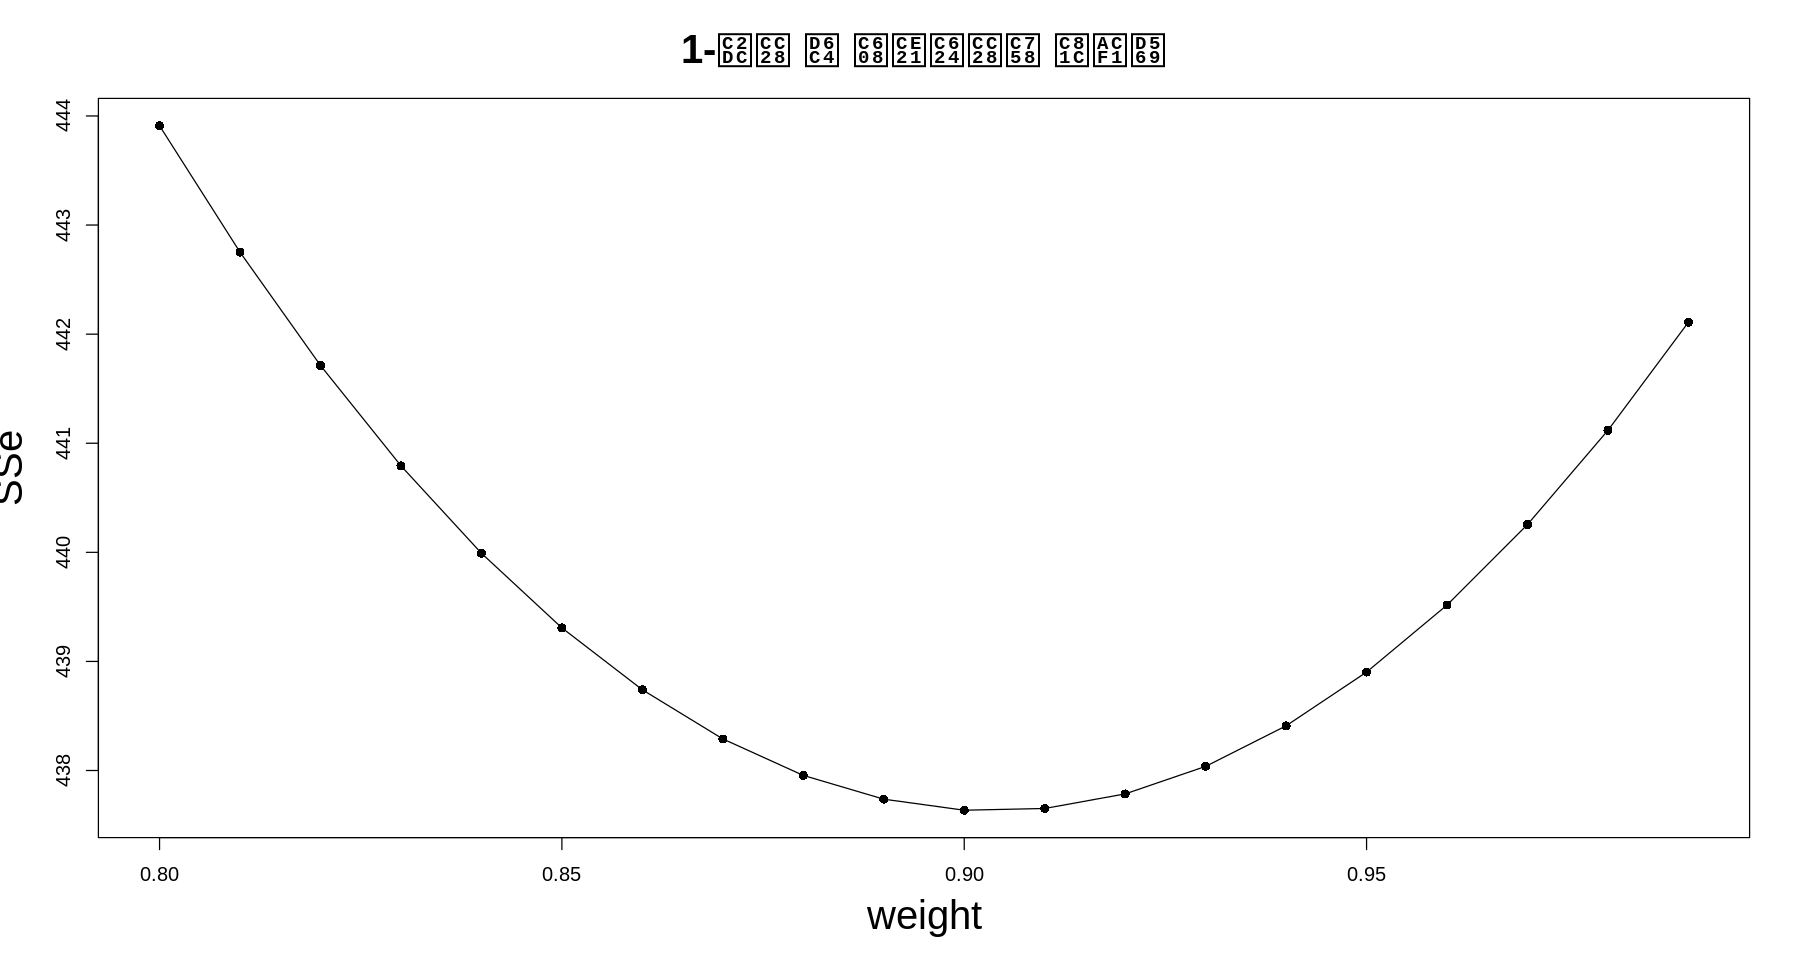

In [33]:
plot(w[-1:-7],SSE_ses[-1:-7],type="o",xlab="weight",ylab="SSe",pch=16,main="1-시차 후 예측오차의 제곱합",cex.main=2,cex.lab=2) ##그래프의 뒷부분을 확대하여 그린 그림

In [34]:
fit1=ses(mindex,alpha=w[which.min(SSE_ses)],initial="simple",h=6)

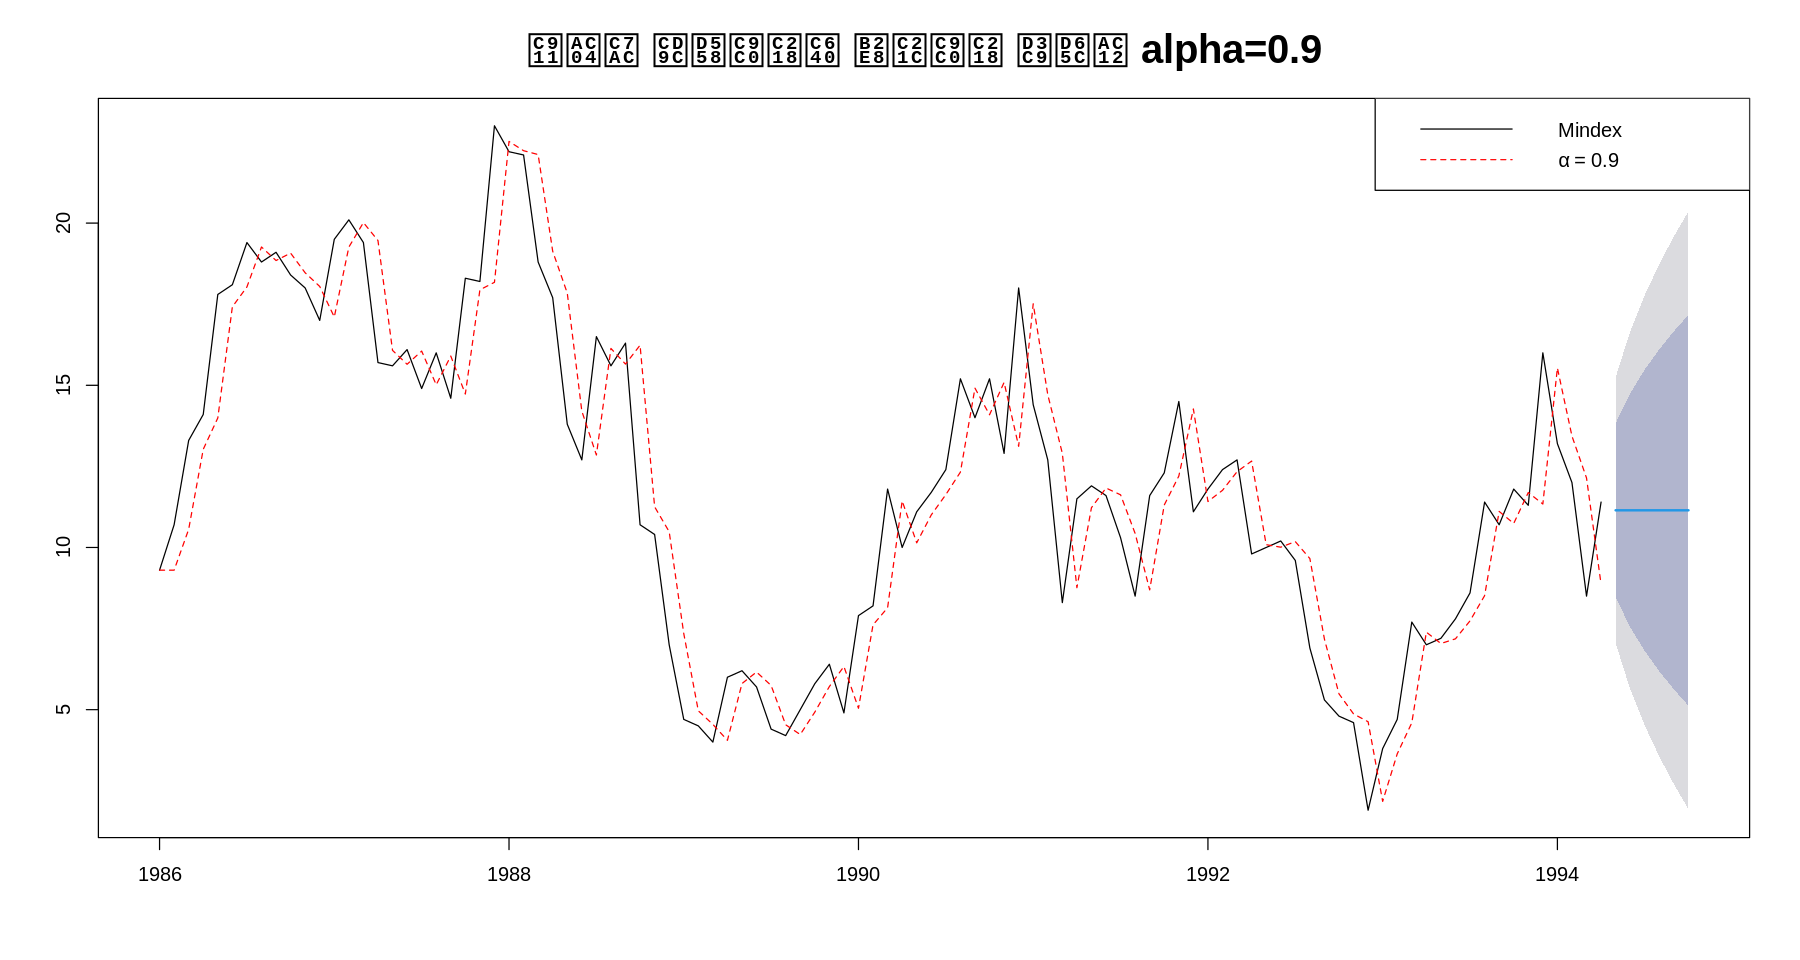

In [35]:
plot(fit1,xlab="",ylab="",
    main="중간재 출하지수와 단순지수 평활값 alpha=0.9",
    lty=1,col="black",
    cex.main=2,cex.lab=2)
lines(fitted(fit1),col="red",lty=2)
legend("topright",legend=c("Mindex",expression(alpha==0.9)),lty=1:2,col=c("black","red"))

- alpha값이 0.9로 커지면서 평활값이 거의 원래 데이터와 유사하게 움직임 -> 약 1시차정도의 delay가 존재하는 느낌임!

In [36]:
fit0_w=HoltWinters(mindex,beta=FALSE,gamma=FALSE)
fit0_w

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mindex, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9036403
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 11.15433

- alpha 값을 따로 지정하지 않으면 자동으로 가장 적당한 값을 찾아준다

### 잔차

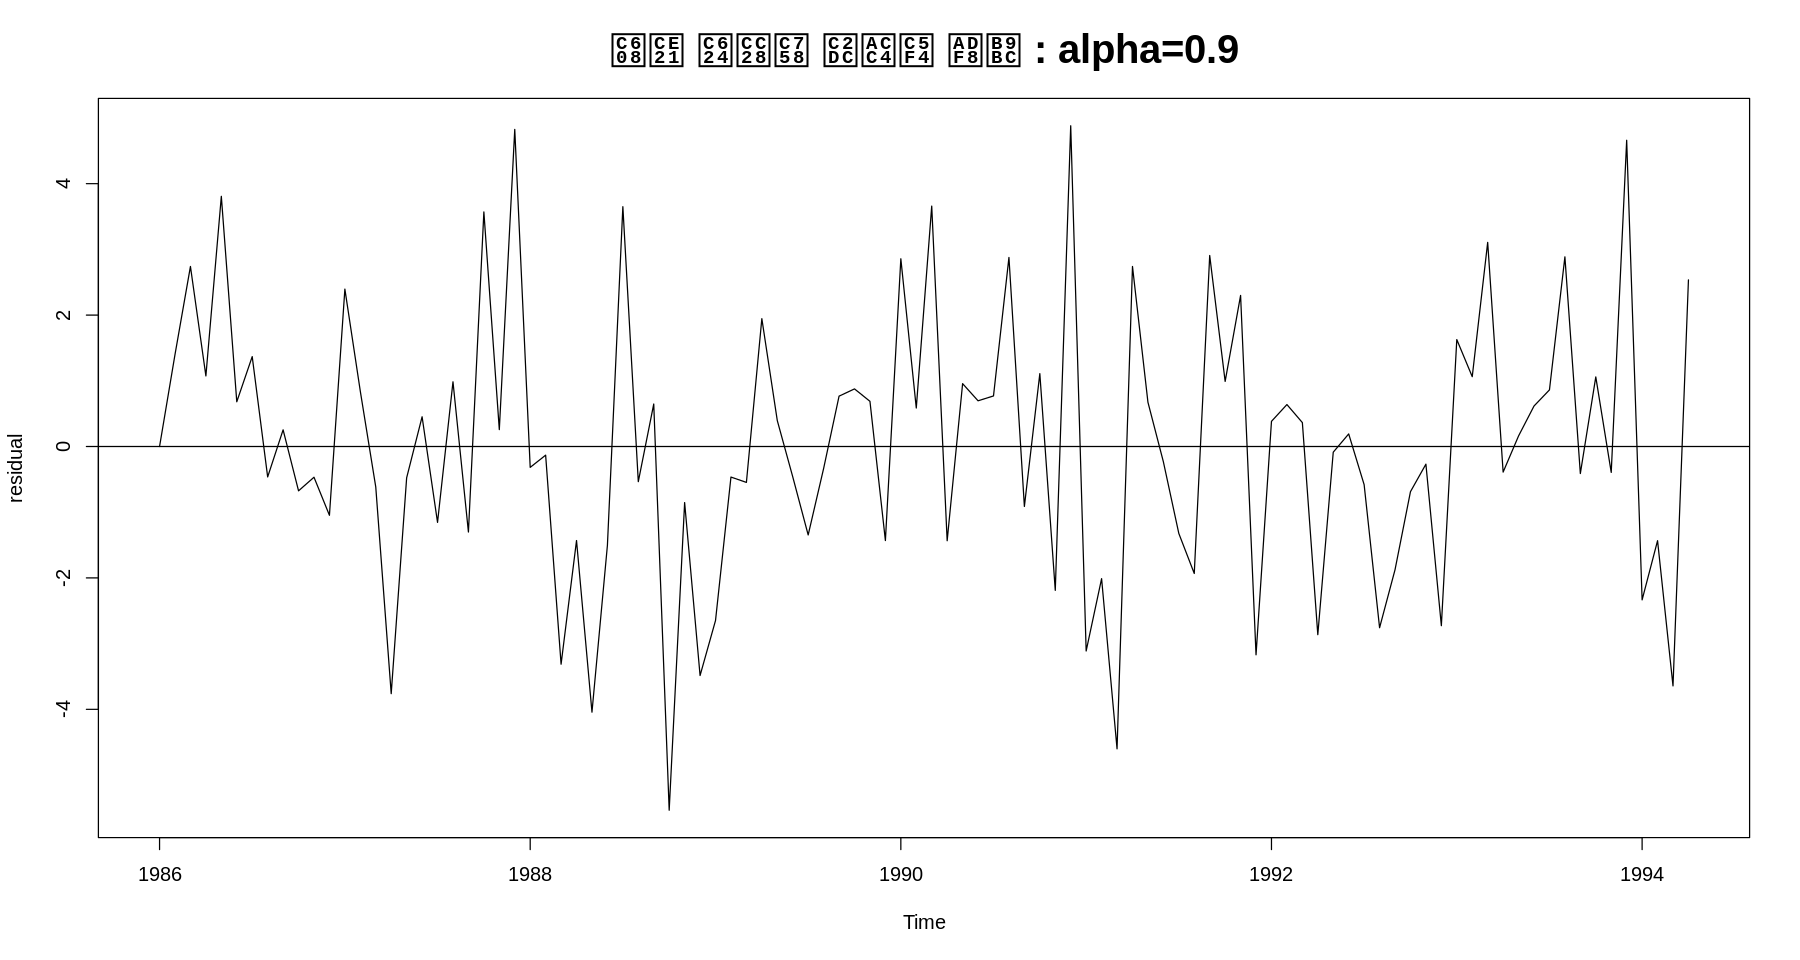

In [37]:
plot(fit1$residuals,ylab="residual",main="예측 오차의 시계열 그림 : alpha=0.9",cex.main=2,cex.lab=2)
abline(h=0)

### 오차의 평균이 0인가?
H_0 : μ=0 vs H_1 : μ ≠ 0

In [38]:
t.test(fit1$residual)


	One Sample t-test

data:  fit1$residual
t = 0.097583, df = 99, p-value = 0.9225
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.3966485  0.4376803
sample estimates:
 mean of x 
0.02051593 


- p-value값이 큼! -> 영가설 기각할 수 없음 => 평균이 0이다

### 오차가 독립인가?

In [39]:
dwtest(lm(fit1$residual~1))


	Durbin-Watson test

data:  lm(fit1$residual ~ 1)
DW = 2.0148, p-value = 0.5298
alternative hypothesis: true autocorrelation is greater than 0


- DW ≃ 2근처의 값이 나왔음! -> 독립이라고 이야기 할 수 잇음

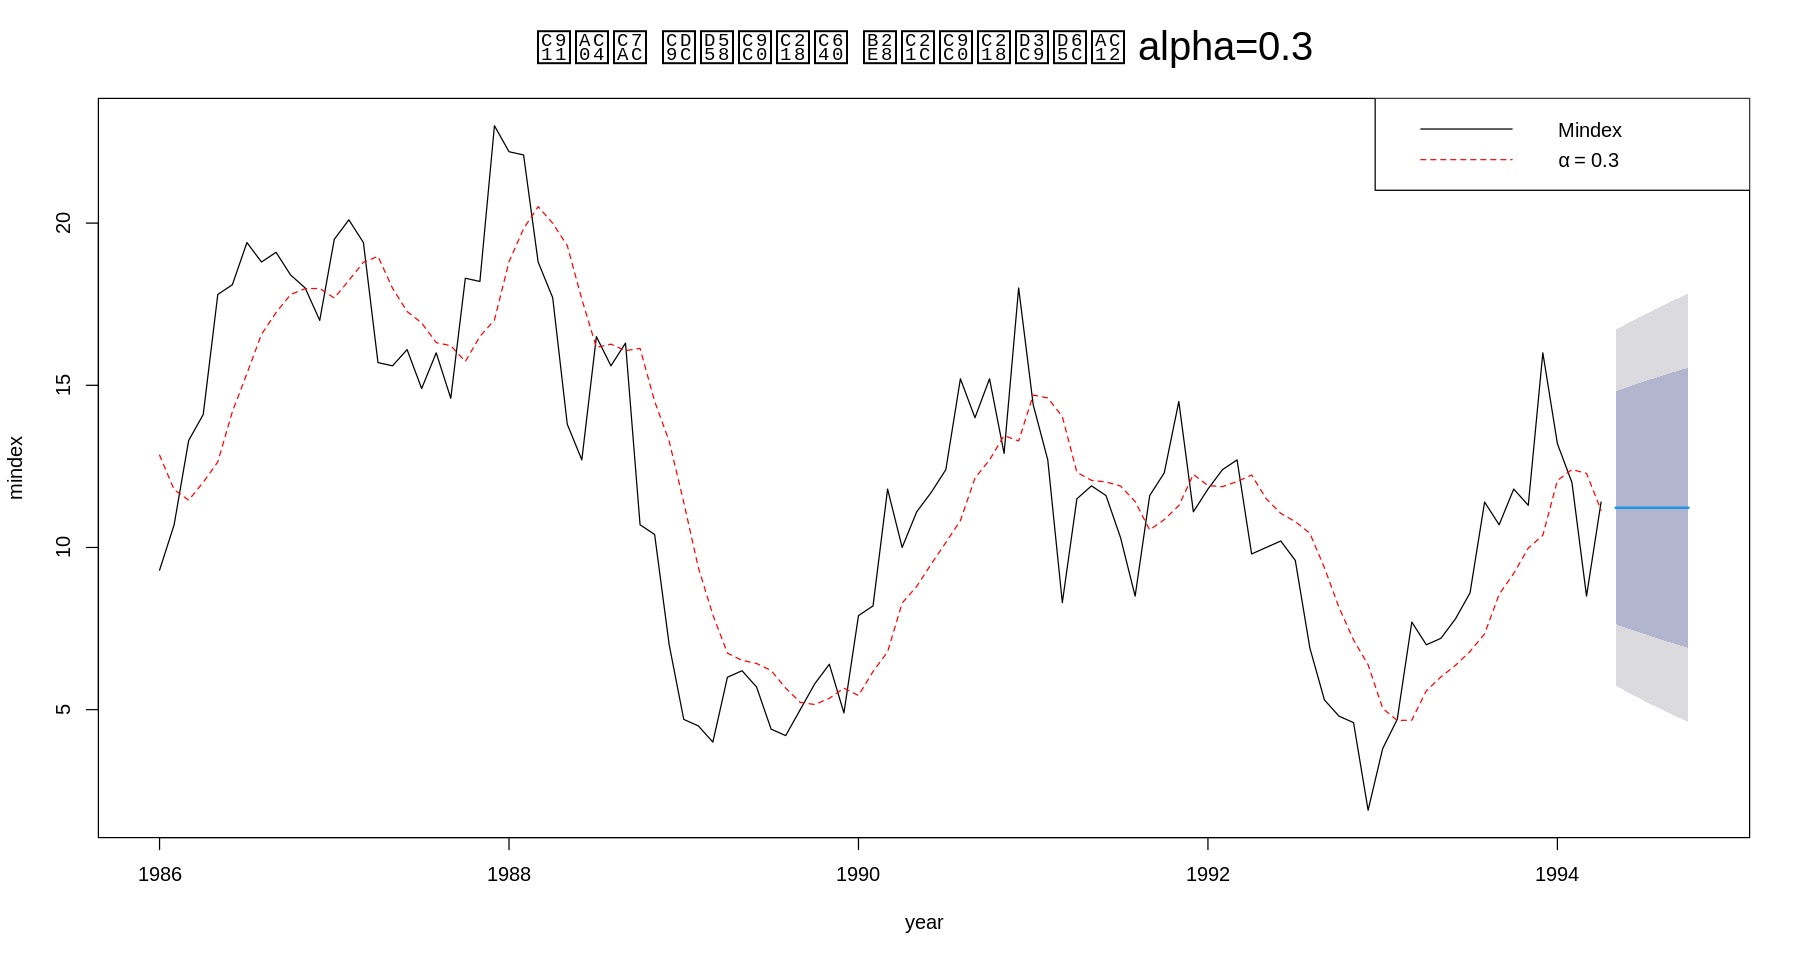

In [40]:
fit2=ses(mindex,alpha=0.3,h=6)
plot(fit2,xlab="year",ylab="mindex",main=expression("중간재 출하지수와 단순지수평활값 alpha=0.3"),
    lty=1,col="black",cex.main=2,cex.lab=2)
lines(fitted(fit2),col="red",lty=2)
legend("topright",legend=c("Mindex",expression(alpha==0.3)),lty=1:2,col=c("black","red"))

- 평활 alpha 값이 0.3 일때

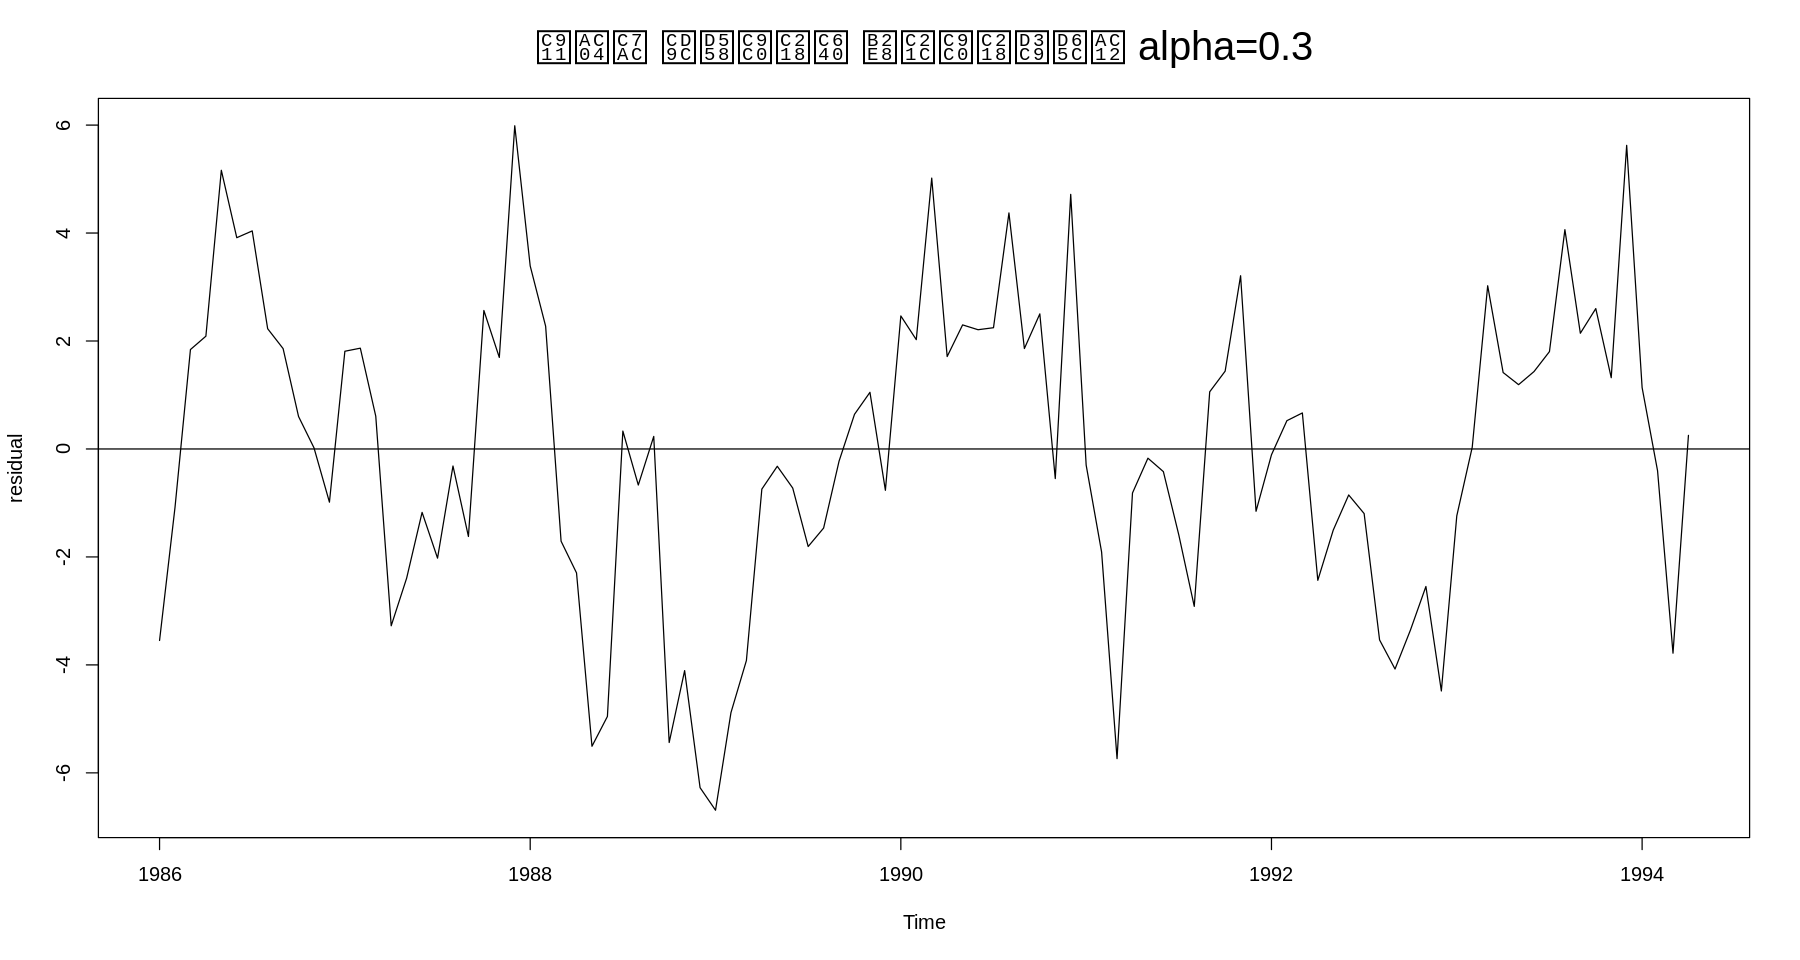

In [41]:
plot(fit2$residuals,ylab="residual",main=expression("중간재 출하지수와 단순지수평활값 alpha=0.3"),
    cex.main=2,cex.lab=2)
abline(h=0)

- 양의 상관관계가 존재하는 것처럼 보임

### 오차의 평균이 0인가?

In [42]:
t.test(fit2$residual)


	One Sample t-test

data:  fit2$residual
t = -0.19433, df = 99, p-value = 0.8463
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.6067721  0.4985236
sample estimates:
  mean of x 
-0.05412425 


### 오차가 독립?

In [43]:
dwtest(lm(fit2$residual~1))


	Durbin-Watson test

data:  lm(fit2$residual ~ 1)
DW = 0.70285, p-value = 2.853e-11
alternative hypothesis: true autocorrelation is greater than 0


- 0에 가까운 값 : 양의 상관관계 존재!

## 이중지수평활법

In [44]:
z=scan("stock.txt")
stock=ts(z,start=c(1984,1),frequency=12)

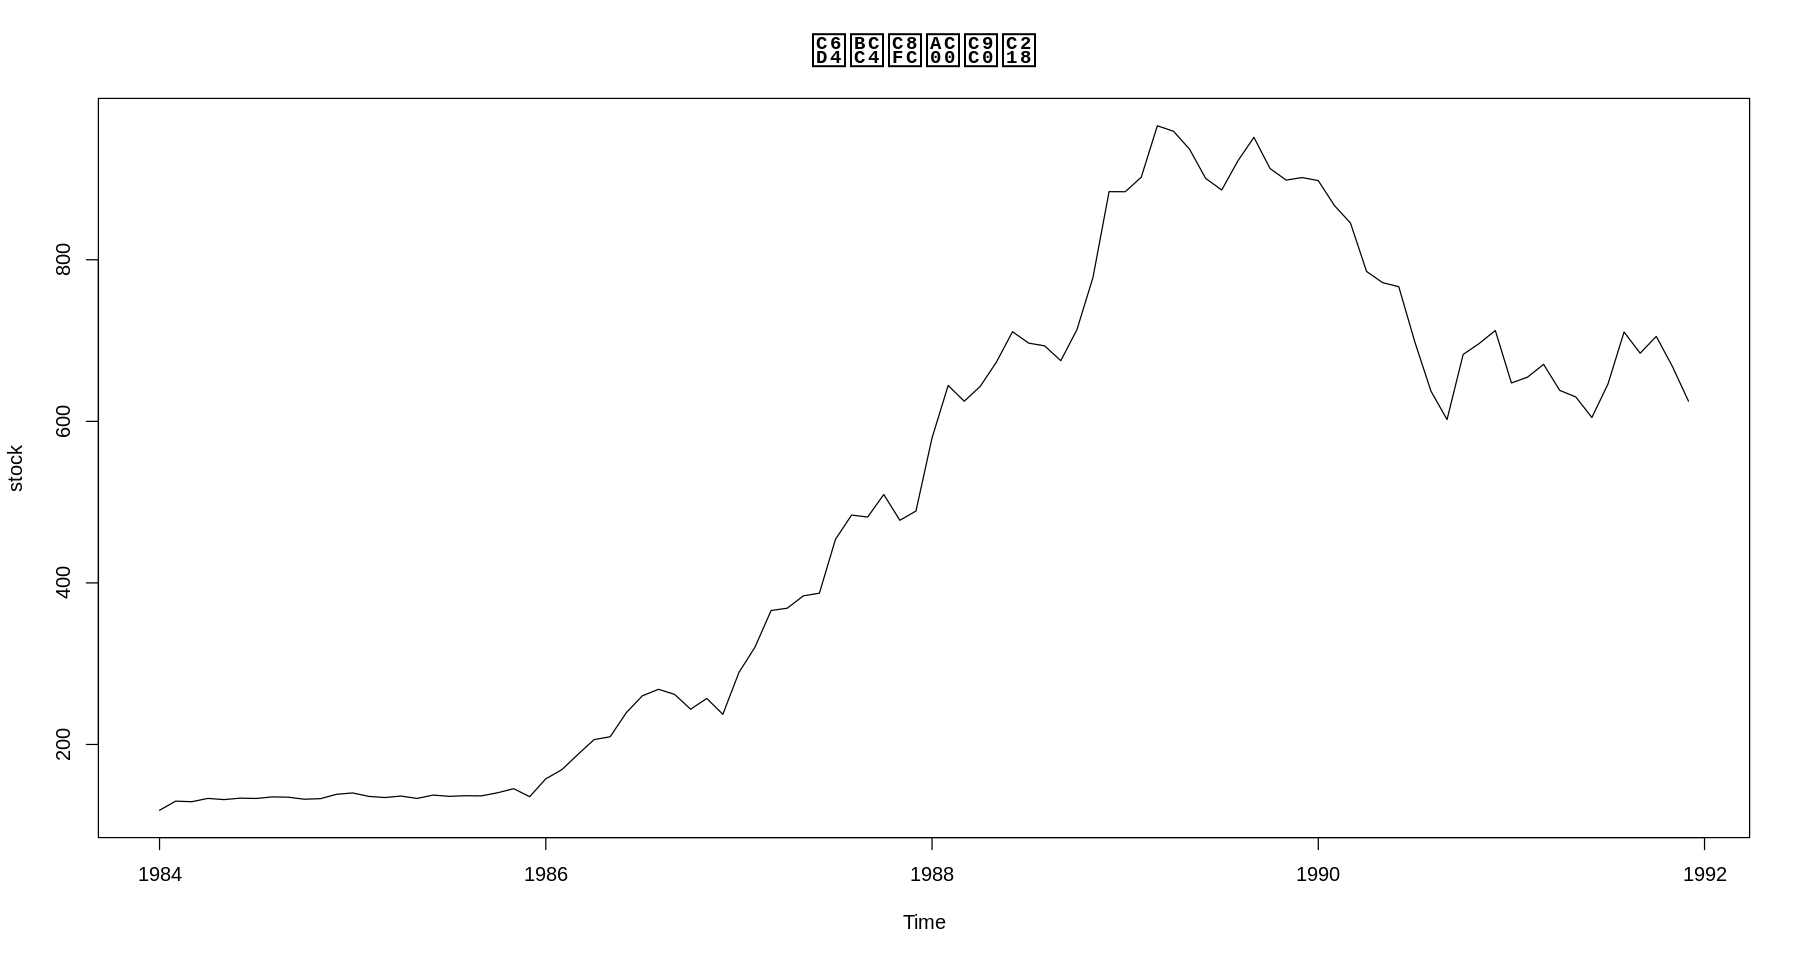

In [45]:
plot(stock,main="월별주가지수",cex.main=2,cex.lab=2)

###1모수 이중지수평활 (α=β)

In [46]:
fit4=holt(stock,alpha=0.6,beta=0.6,h=6)
fit4$model

Holt's method 

Call:
 holt(y = stock, h = 6, alpha = 0.6, beta = 0.6) 

  Smoothing parameters:
    alpha = 0.6 
    beta  = 0.6 

  Initial states:
    l = 115.6009 
    b = 6.8098 

  sigma:  40.2546

     AIC     AICc      BIC 
1149.575 1149.836 1157.268 

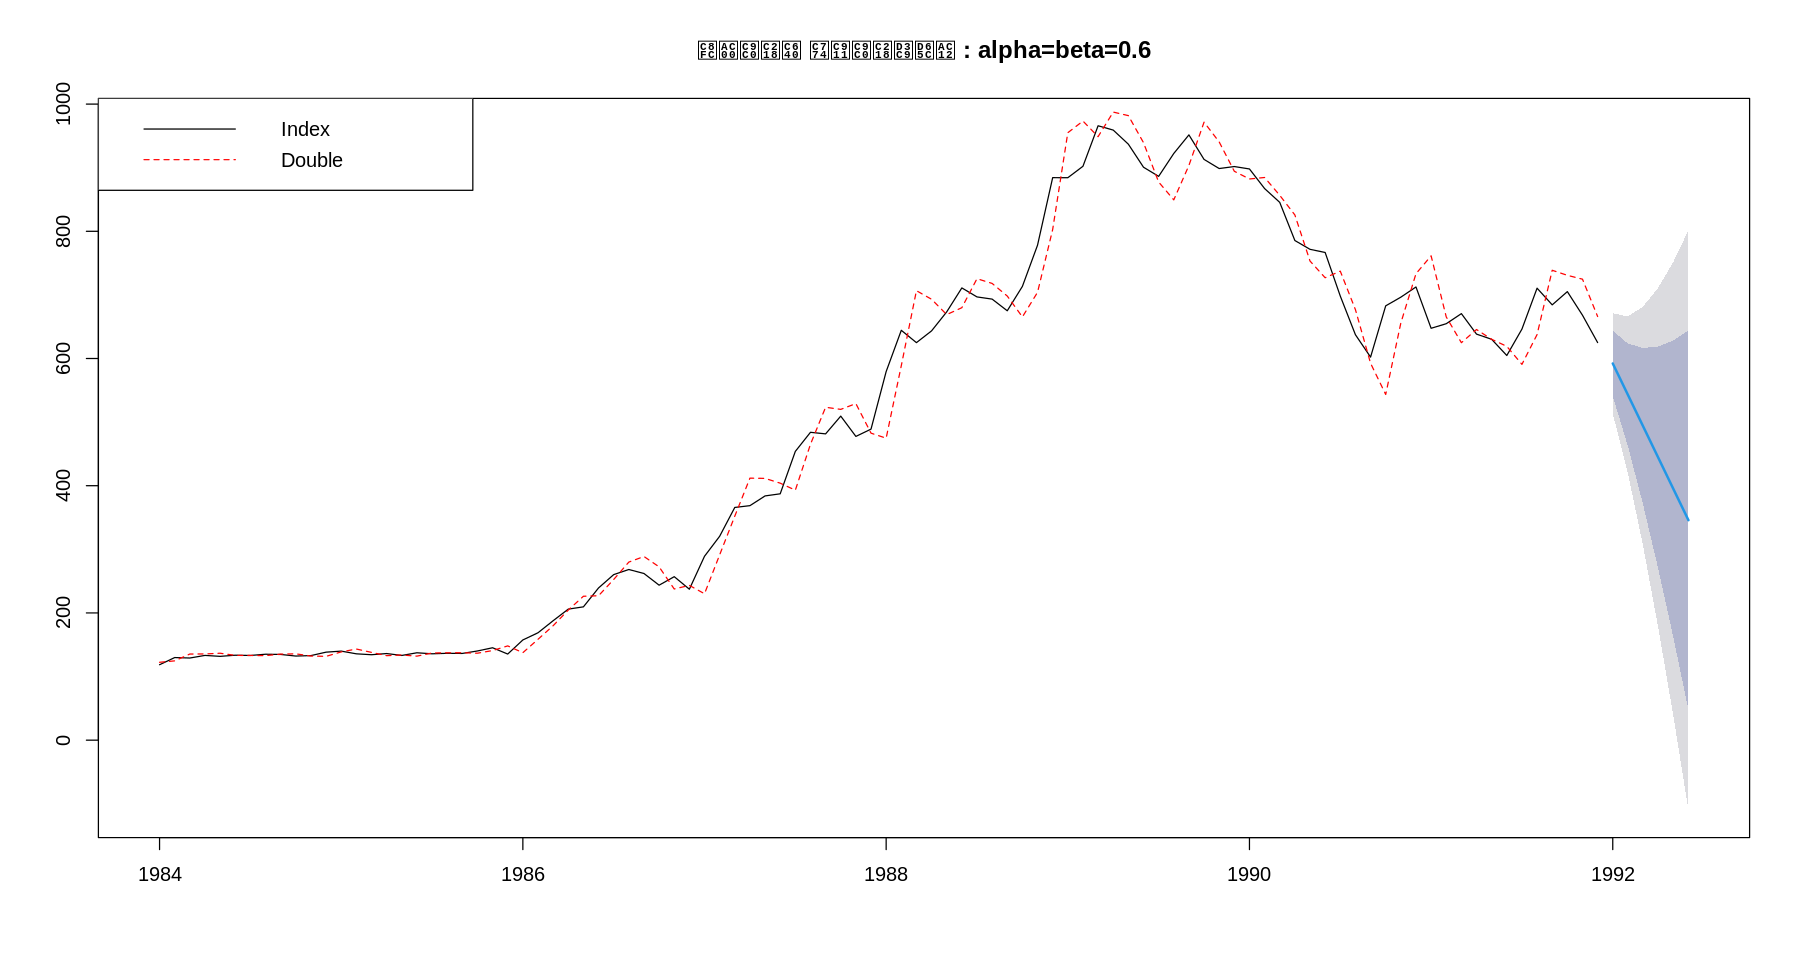

In [47]:
plot(fit4,ylab="",xlab="",lty=1,col="black",main="주가지수와 이중지수평활값 : alpha=beta=0.6")
lines(fitted(fit4),col="red",lty=2)
legend("topleft",lty=1:2,col=c("black","red"),c("Index","Double"))

- 최근 하락세인 경향성을 강하게 반영한 듯한 느낌

### 이중지수평활 α,β 추정

In [48]:
fit5=holt(stock,h=6)
fit5$model

Holt's method 

Call:
 holt(y = stock, h = 6) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1071 

  Initial states:
    l = 124.1137 
    b = 3.4954 

  sigma:  31.8609

     AIC     AICc      BIC 
1108.677 1109.343 1121.498 

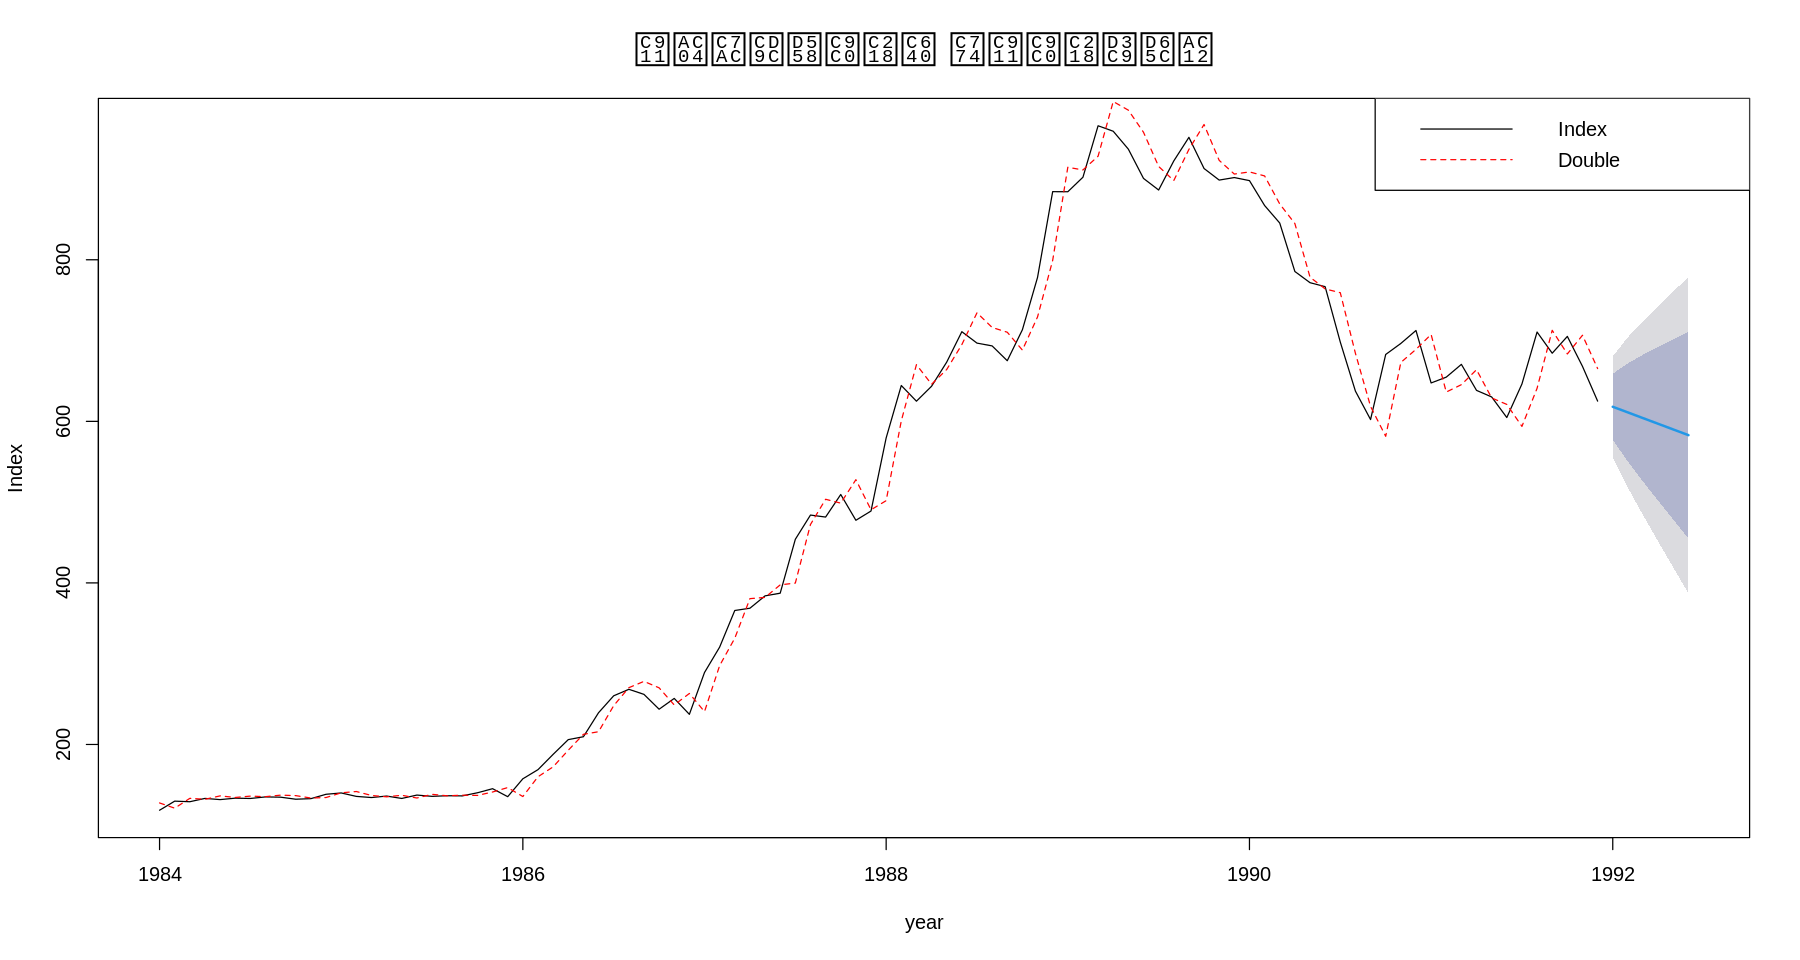

In [49]:
plot(fit5,xlab="year",ylab="Index",col="black",lty=1,main=expression("중간재출하지수와 이중지수평활값" ),cex.main=2)
lines(fitted(fit5),col="red",lty=2)
legend("topright",lty=1:2,col=c("black","red"),c("Index","Double"))

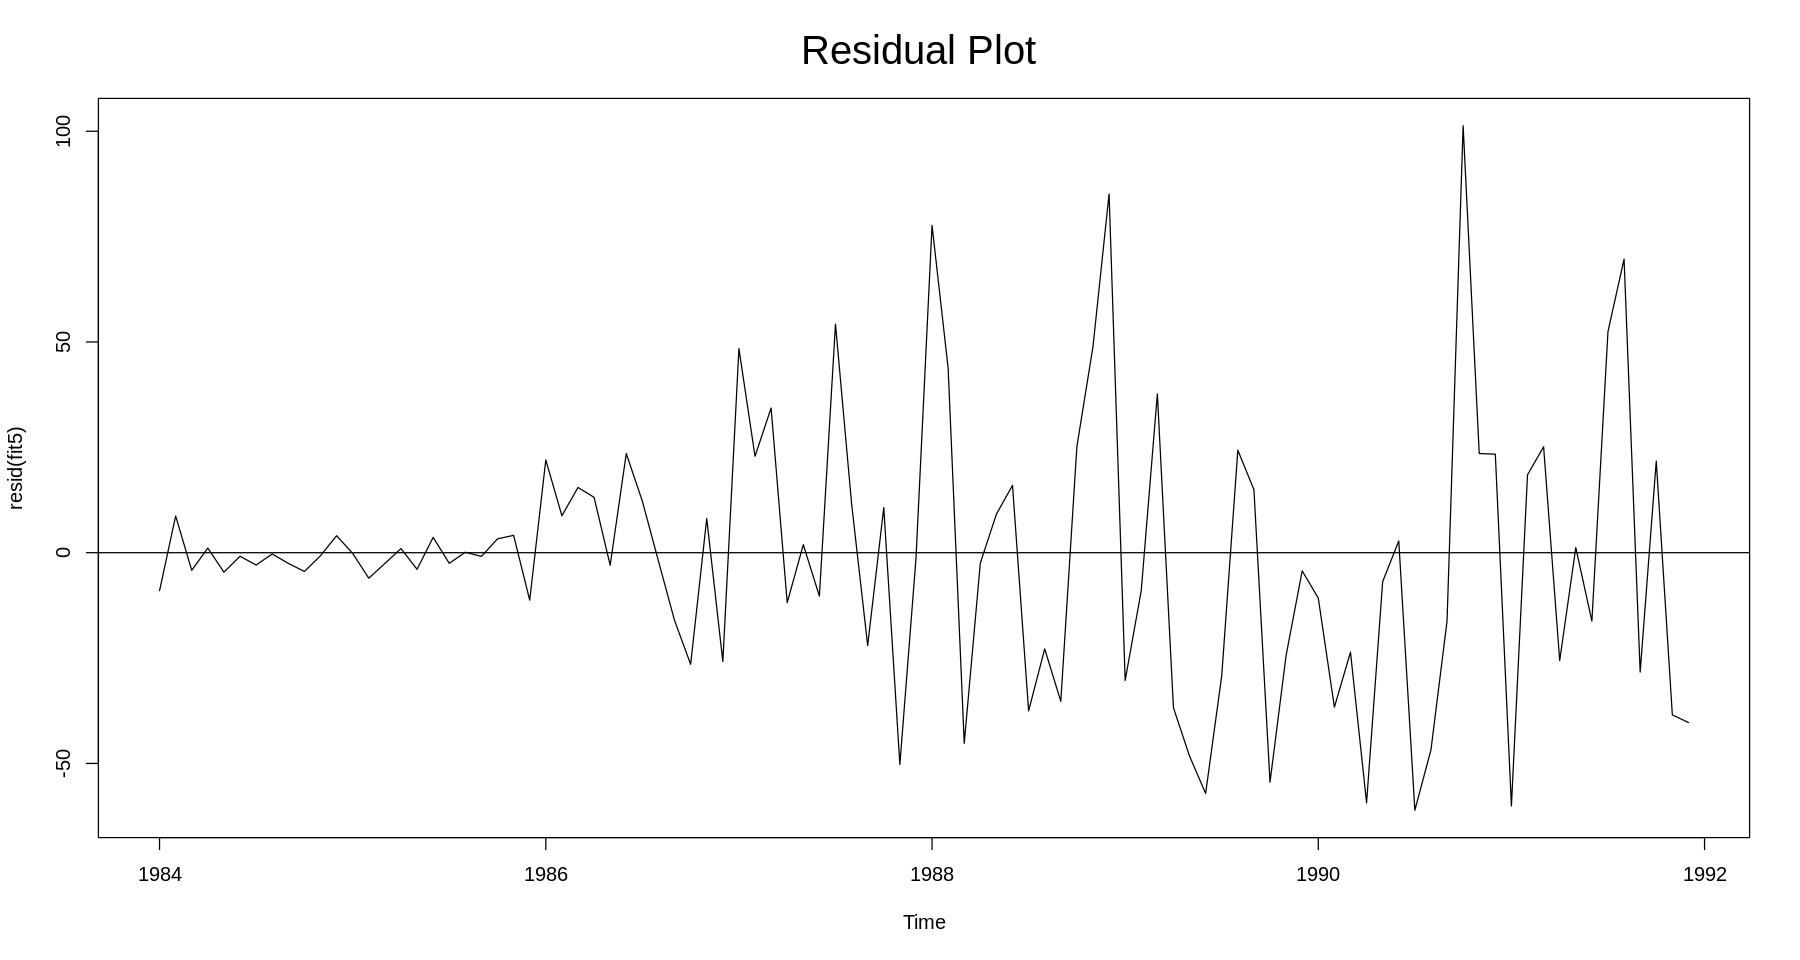

In [50]:
plot(resid(fit5),main=expression("Residual Plot "),cex.main=2)
abline(h=0)

## 계절지수평활

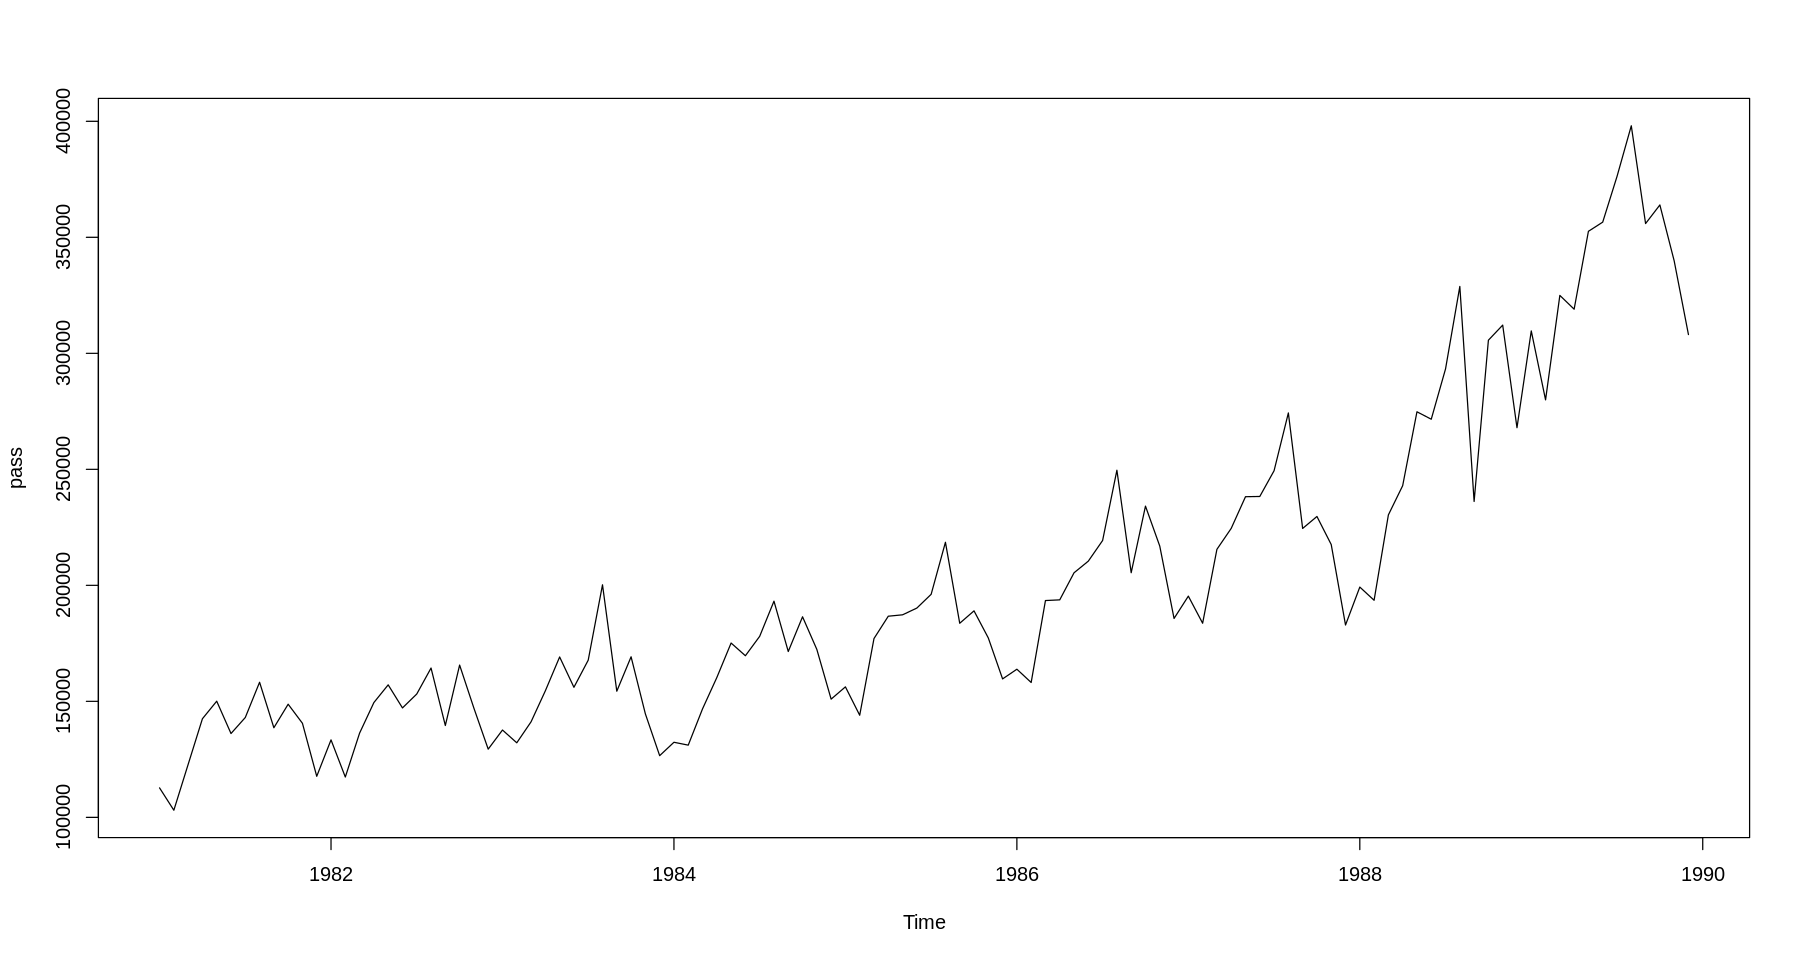

In [51]:
z=scan("koreapass.txt")
pass=ts(z,start=c(1981,1),frequency=12)
plot.ts(pass)

### Holt Winters additive model
- 가법모형

In [52]:
fit_hw=HoltWinters(pass)

In [53]:
fit_hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = pass)

Smoothing parameters:
 alpha: 0.4810767
 beta : 0.0383379
 gamma: 0.7345988

Coefficients:
          [,1]
a   347794.753
b     3363.251
s1  -12186.666
s2  -33643.322
s3    4855.643
s4    5000.713
s5   29085.909
s6   22953.006
s7   32200.195
s8   49687.643
s9  -11655.430
s10  10218.813
s11  -4226.391
s12 -38683.394

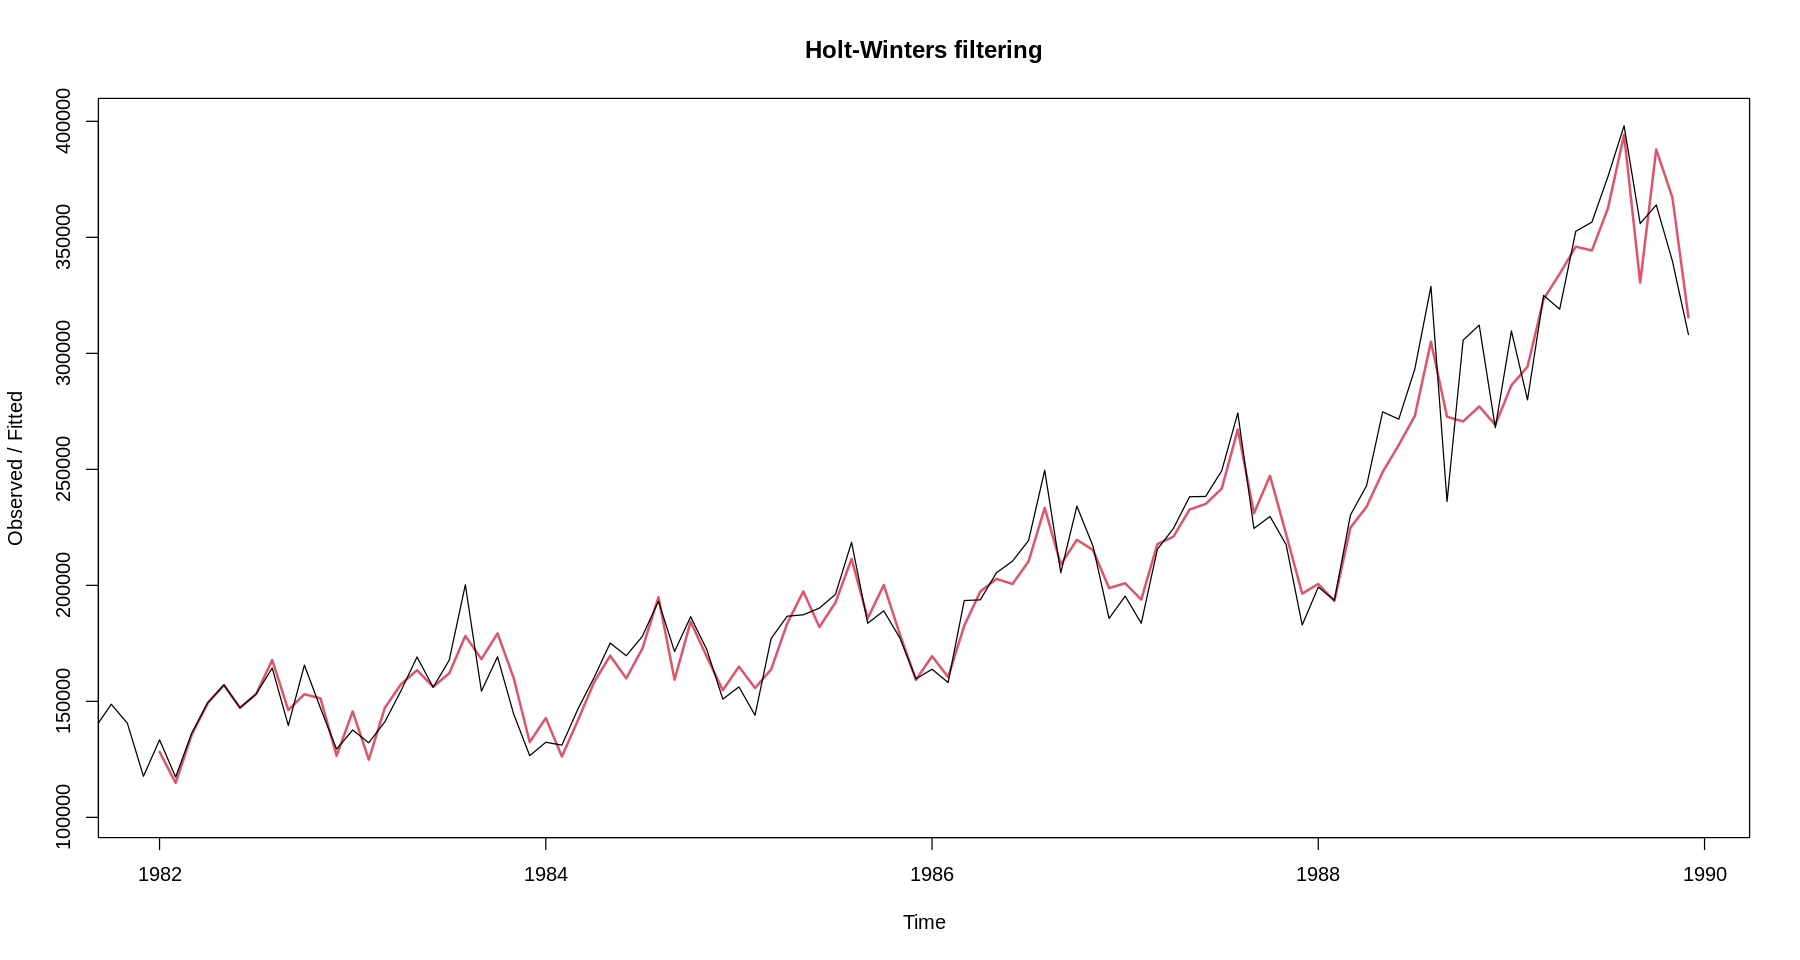

In [54]:
plot(fit_hw,lwd=2)

In [55]:
predict(fit_hw,n.ahead=12,prediction.interval=T,level=0.95)

,fit,upr,lwr
Jan 1990,338971.3,362386.4,315556.2
Feb 1990,320877.9,347051.8,294704.1
Mar 1990,362740.1,391587.4,333892.9
Apr 1990,366248.5,397711.4,334785.5
May 1990,393696.9,427736.7,359657.1
Jun 1990,390927.3,427518.3,354336.2
Jul 1990,403537.7,442664.2,364411.2
Aug 1990,424388.4,466041.9,382734.9
Sep 1990,366408.6,410586.3,322230.9
Oct 1990,391646.1,438349.7,344942.5


In [56]:
fit6=hw(pass,alpha=fit_hw$alpha,beta=fit_hw$beta,gamma=fit_hw$gamma,seasonal="additive",initial="simple",h=12)
fit6$model

Holt-Winters' additive method 

Call:
 hw(y = pass, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw$alpha, beta = fit_hw$beta, gamma = fit_hw$gamma) 

  Smoothing parameters:
    alpha = 0.4811 
    beta  = 0.0383 
    gamma = 0.7346 

  Initial states:
    l = 134510.75 
    b = 874.0694 
    s = -16817.75 6028.25 14250.25 4115.25 23712.25 8522.25
           1617.25 15553.25 7985.25 -11710.75 -31440.75 -21814.75

  sigma:  12483.69

In [57]:
fit6

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1990       339962.9 323964.4 355961.4 315495.3 364430.4
Feb 1990       307759.0 289731.1 325786.9 280187.7 335330.3
Mar 1990       354907.1 334791.7 375022.5 324143.3 385670.9
Apr 1990       353308.1 331046.6 375569.6 319262.1 387354.2
May 1990       391666.8 367200.6 416133.1 354249.0 429084.7
Jun 1990       393291.1 366562.0 420020.2 352412.5 434169.7
Jul 1990       408050.5 379001.1 437099.9 363623.2 452477.8
Aug 1990       428126.3 396699.7 459552.8 380063.5 476189.1
Sep 1990       374195.2 340335.6 408054.7 322411.4 425978.9
Oct 1990       381277.1 344929.5 417624.7 325688.2 436866.0
Nov 1990       373366.6 334476.8 412256.5 313889.7 432843.5
Dec 1990       347593.0 306107.7 389078.3 284146.7 411039.3

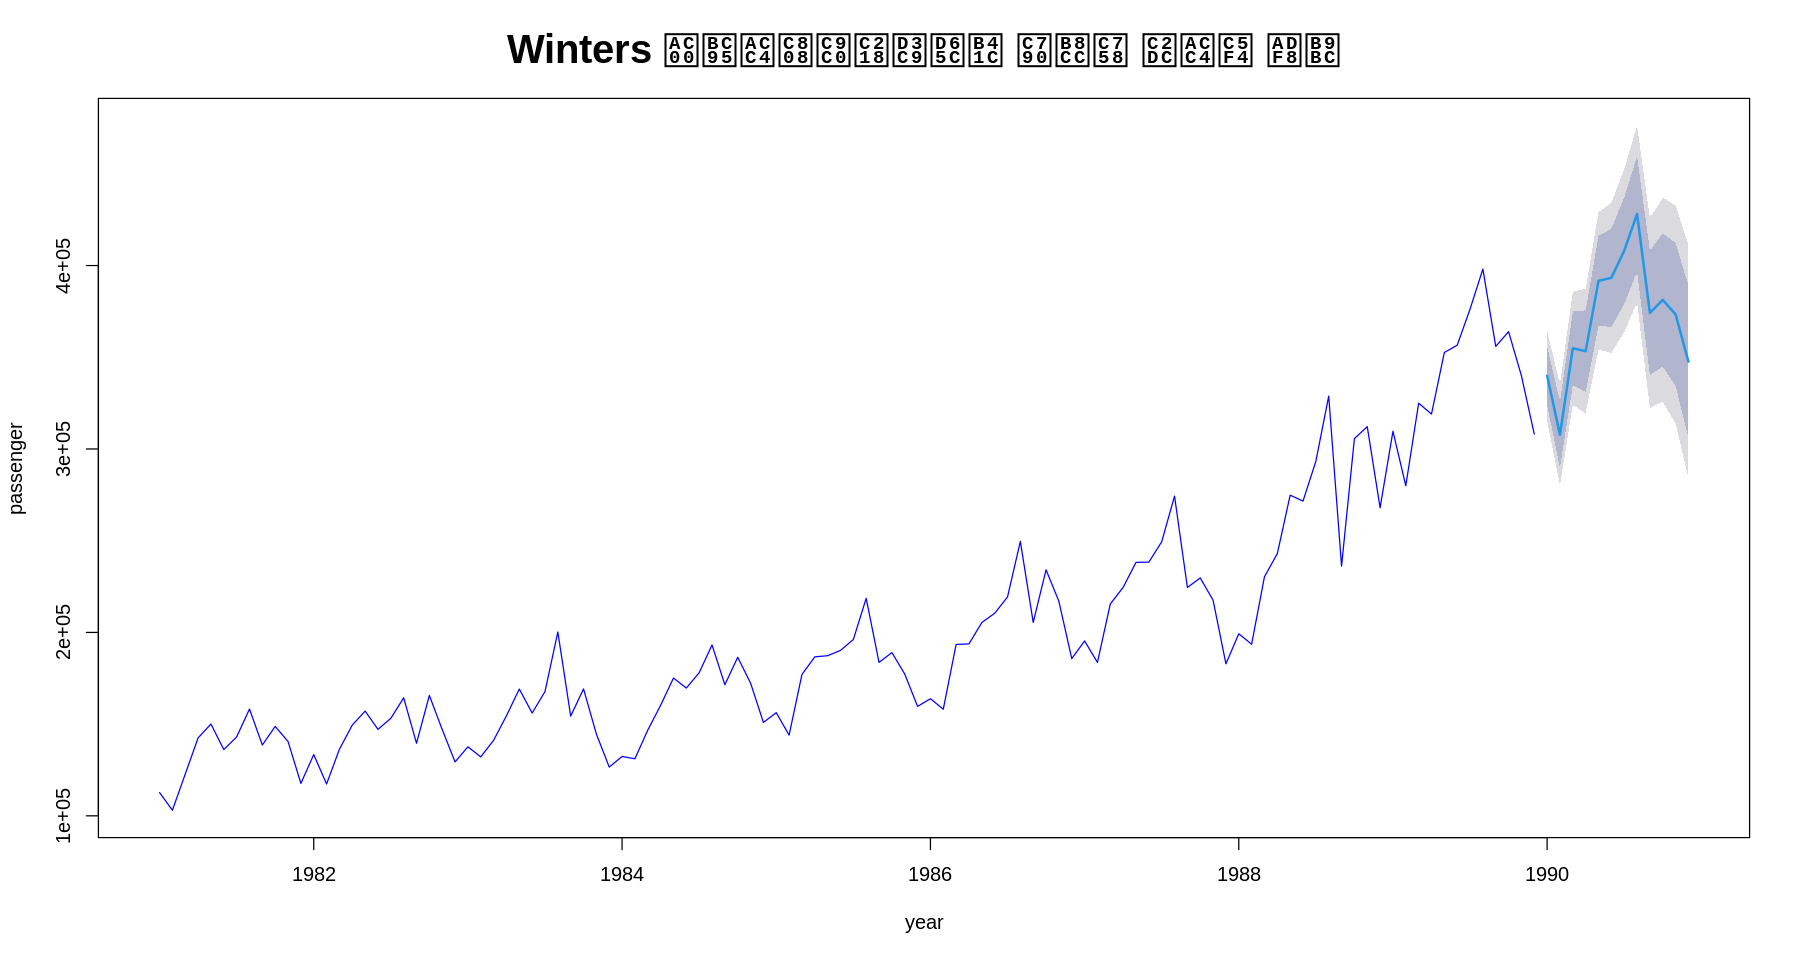

In [58]:
plot(fit6,xlab="year",ylab="passenger",lty=1,col="blue",main="Winters 가법계절지수평활된 자료의 시계열 그림",cex.main=2)

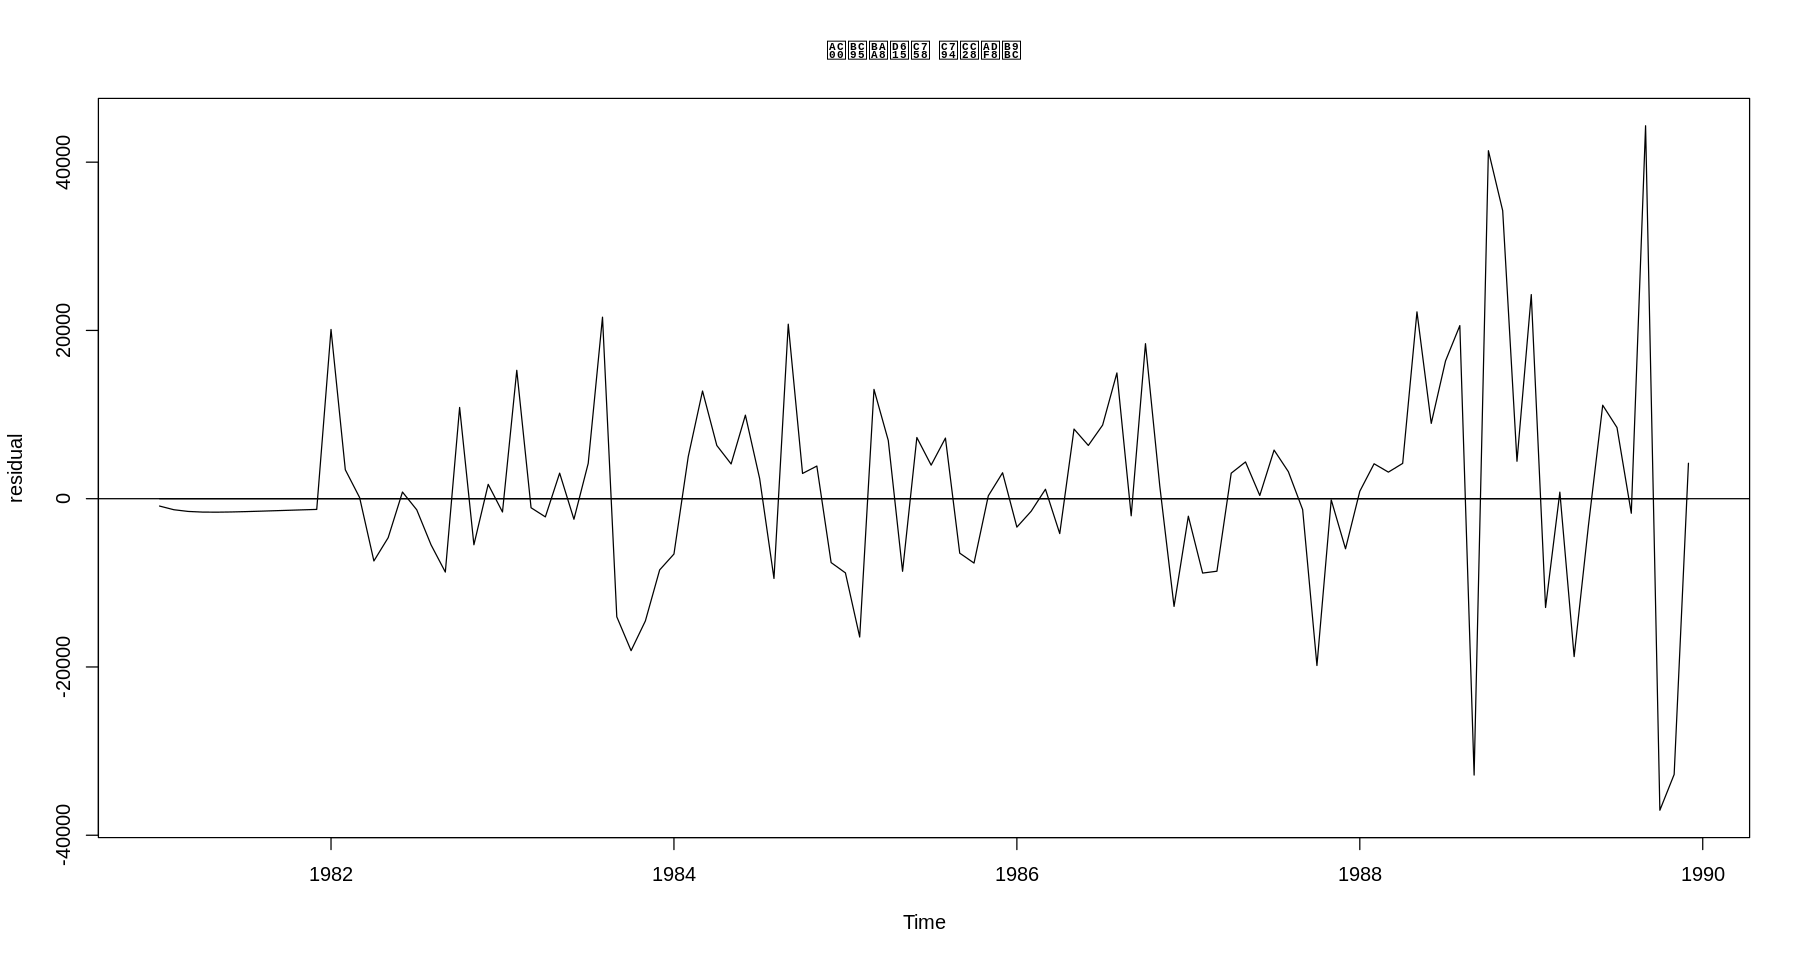

In [59]:
ts.plot(fit6$residual,ylab="residual",main="가법모형의 잔차그림",cex.main=2)
abline(h=0)

In [61]:
dwtest(lm(fit6$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit6$residual ~ 1)
DW = 1.9794, p-value = 0.9139
alternative hypothesis: true autocorrelation is not 0


- 오차항 독립!

### Holt Winters multiplicative model

In [65]:
fit_hw_m=HoltWinters(pass,seasonal="multiplicative")
fit_hw_m

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = pass, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.5623303
 beta : 0.03452066
 gamma: 0.3506508

Coefficients:
            [,1]
a   3.560417e+05
b   3.517556e+03
s1  9.199511e-01
s2  8.489190e-01
s3  9.796617e-01
s4  1.016528e+00
s5  1.095078e+00
s6  1.060795e+00
s7  1.089621e+00
s8  1.178393e+00
s9  9.706046e-01
s10 1.065056e+00
s11 9.983082e-01
s12 8.552947e-01

In [66]:
predict(fit_hw_m,n.ahead=12,prediction.interval=T,level=0.95)

,fit,upr,lwr
Jan 1990,330777.0,346829.6,314724.3
Feb 1990,308222.8,328288.3,288157.4
Mar 1990,359138.5,385415.3,332861.7
Apr 1990,376229.1,406856.5,345601.8
May 1990,409153.3,445160.0,373146.6
Jun 1990,400075.7,438217.8,361933.6
Jul 1990,414780.3,456969.6,372591.0
Aug 1990,452717.7,501167.0,404268.5
Sep 1990,376303.1,419627.5,332978.8
Oct 1990,416668.2,466954.3,366382.1


In [67]:
fit7=hw(pass,alpha=fit_hw_m$alpha,beta=fit_hw_m$beta,gamma=fit_hw_m$gamma,seasonal="additive",initial="simple",h=12)
fit7$model

Holt-Winters' additive method 

Call:
 hw(y = pass, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw_m$alpha, beta = fit_hw_m$beta, gamma = fit_hw_m$gamma) 

  Smoothing parameters:
    alpha = 0.5623 
    beta  = 0.0345 
    gamma = 0.3507 

  Initial states:
    l = 134510.75 
    b = 874.0694 
    s = -16817.75 6028.25 14250.25 4115.25 23712.25 8522.25
           1617.25 15553.25 7985.25 -11710.75 -31440.75 -21814.75

  sigma:  11683.93

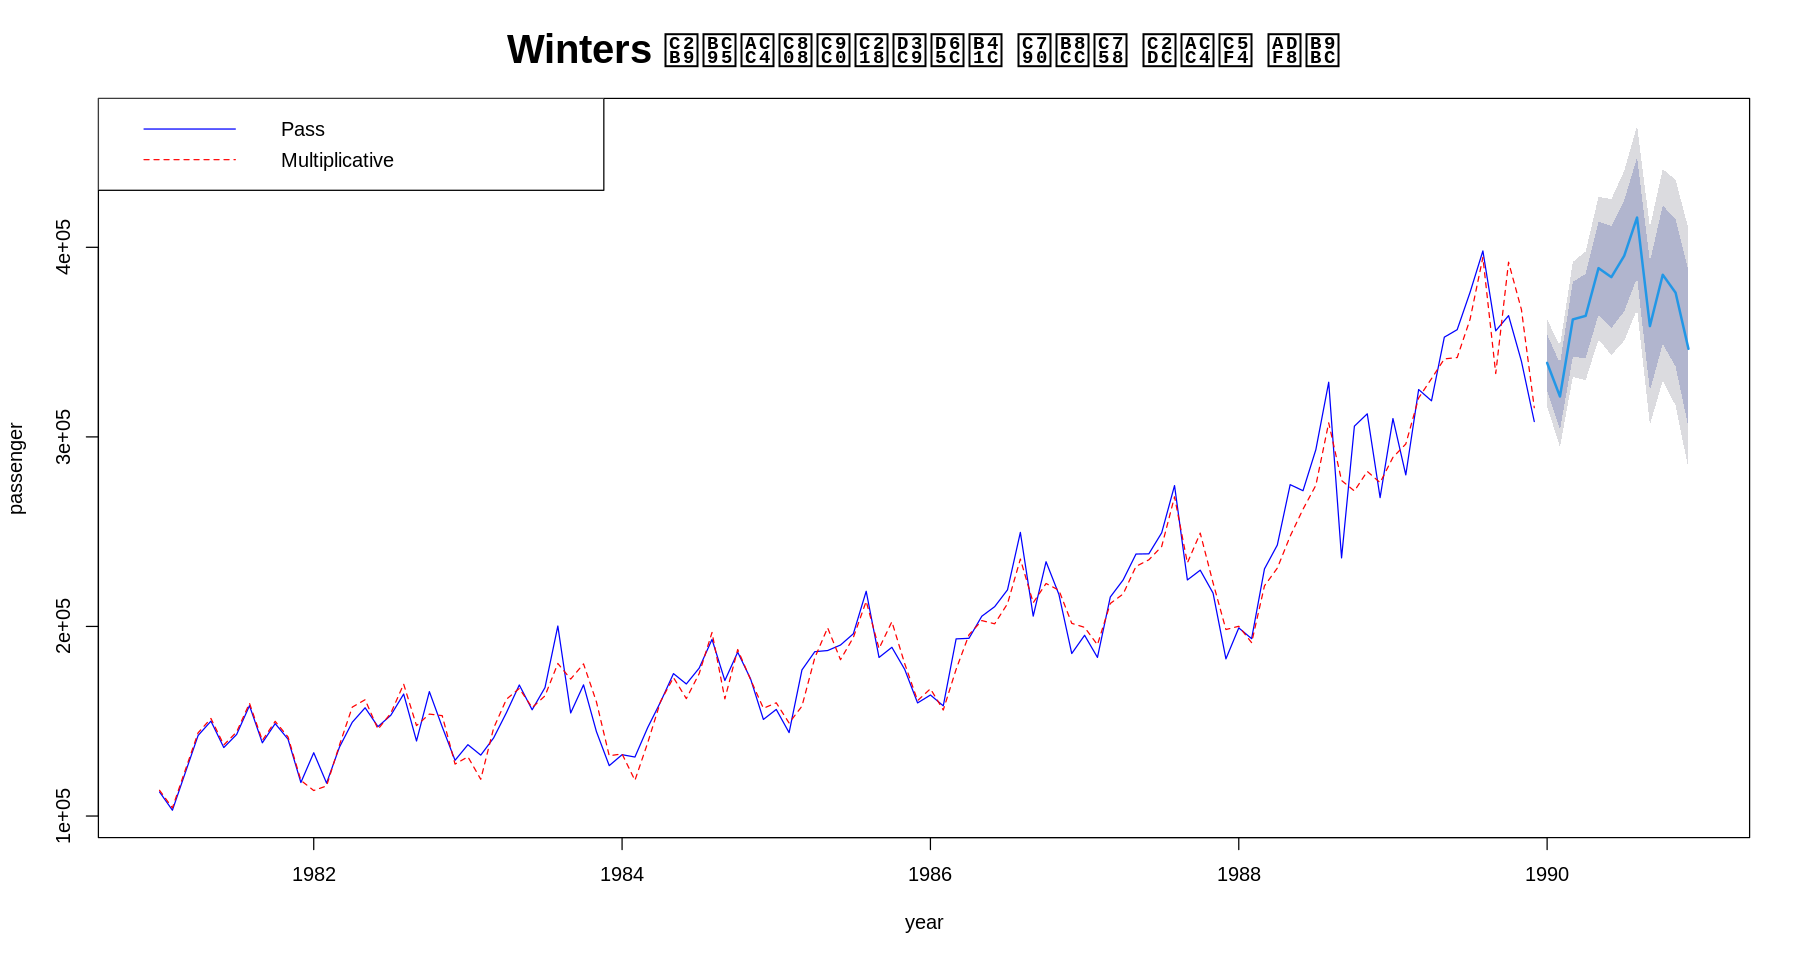

In [68]:
plot(fit7,xlab="year",ylab="passenger",lty=1,col="blue",main="Winters 승법계절지수평활된 자료의 시계열 그림",cex.main=2)
lines(fit7$fitted,col="red",lty=2)
legend("topleft",lty=1:2,col=c("blue","red"),c("Pass","Multiplicative"))

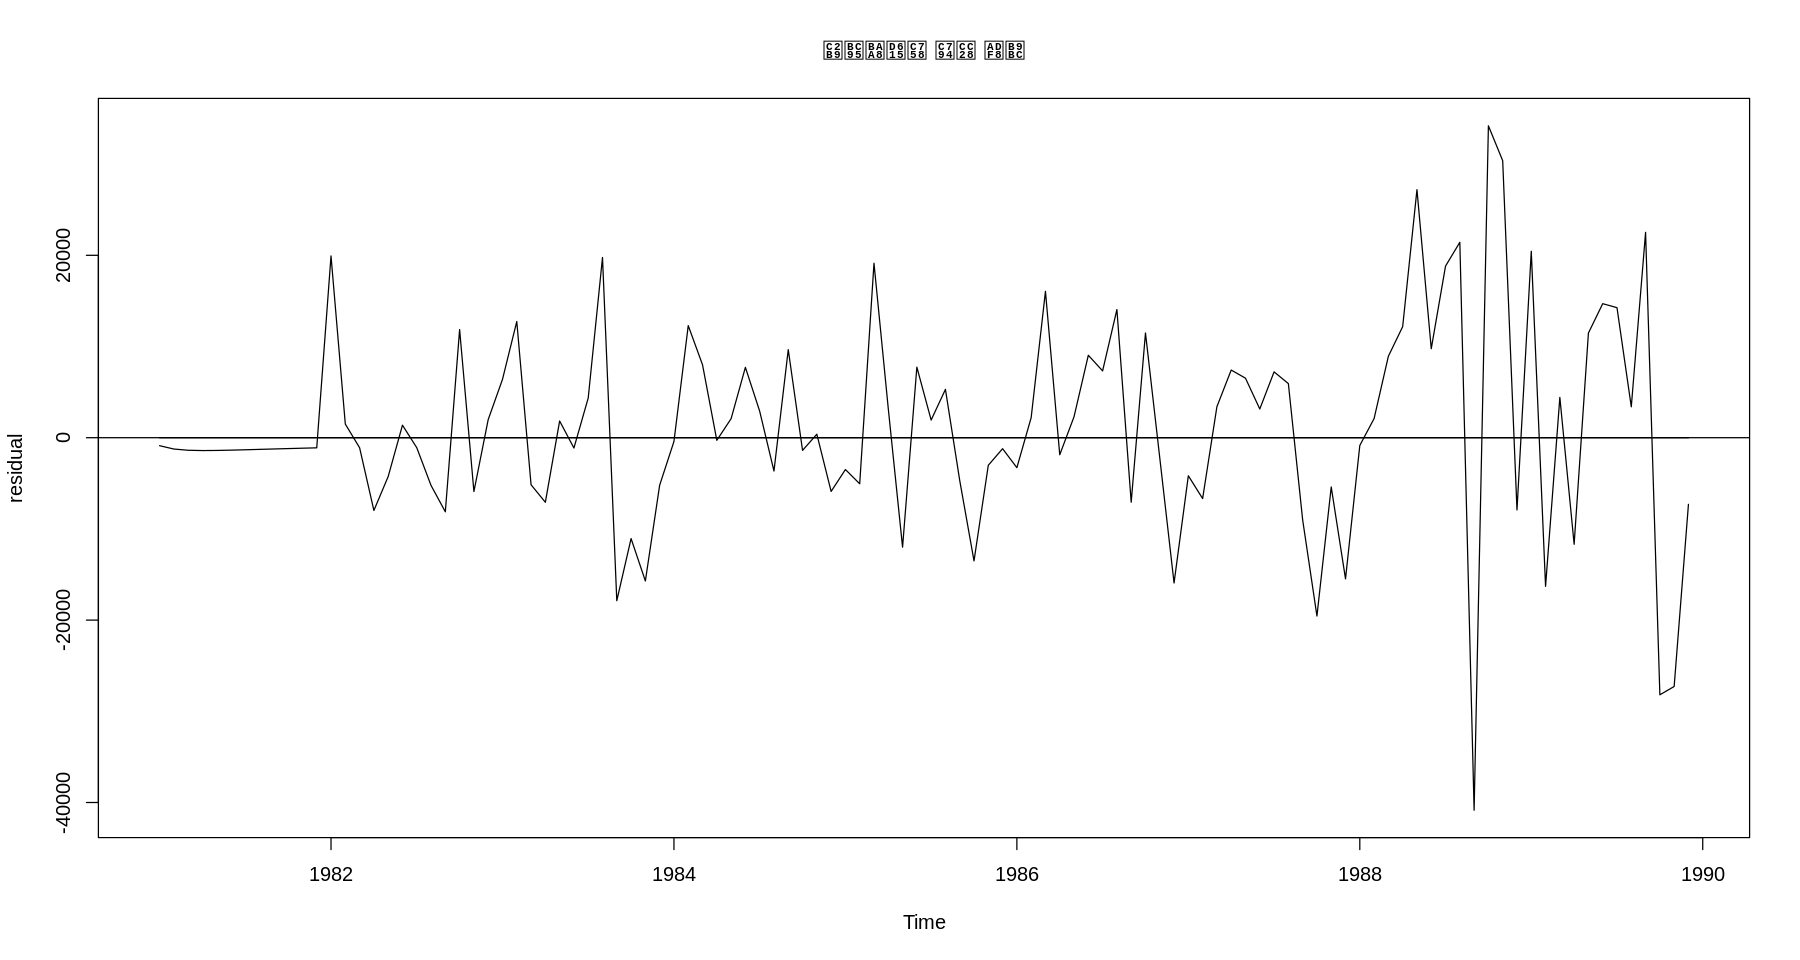

In [69]:
ts.plot(fit7$residual,ylab="residual",main="승법모형의 잔차 그림",cex.main=2)
abline(h=0)

In [70]:
dwtest(lm(fit7$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit7$residual ~ 1)
DW = 1.9176, p-value = 0.6658
alternative hypothesis: true autocorrelation is not 0


### 평활
- Holtwinters(alpha=α,beta=F,gamma=F) vs SES
- Holtwinters(alpha=α,beta=β,gamma=F) vs holt
- Holtwinters(alpha=α,beta=β,gamma=ᵧ) vs hw